<div style="text-align: right"> Efren Andres Mora </div>

<div style="text-align: right">Applied Data Science Capstone</div>

<h1><b>INTERCITY NEIGHBORHOOD CLUSTERING</b> </h1>


<h2><b>Introduction</b>
    




>A small chain business owner stablished in the city of Toronto is looking to expand its business to another big city in Canada and is particularly interested in Montreal. The idea of expanding is new, and she wants to be thorough. She is quite familiar with the city of Toronto and its neighborhoods, but not so much with the city of Montreal. So, to be better oriented and get a better feel of this new city, she has asked for help identifying and mapping equivalent neighborhoods in these two cities and to carry a comparative analysis among these in terms of venue composition and census features. 

<h2><b>Notebook Table of Contents</b></h2>


    > Part 1: Toronto: Web Scraping, Obtaining Geographical Coordinates, Mapping Neighborhoods
    > Part 2: Montreal: Web Scraping, Obtaining Geographical Coordinates, Mapping Neighborhoods
    > Part 3: Concatenating Toronto T.O. & Montreal M.O. Dataframes
    > Part 4: Loading the Datasets Containing Additional Neighborhood Features, and Isolating the Useful Parts for Our Purposes
    > Part 5: Incorporating the New Neighborhood Features to our Dataset
    > Part 6: Preliminary Exploratory Data Analysis
    > Part 7: Neighborhood Exploration with Foursquare
    > Part 8: Cleaning the Venues Data Fetched from Foursquare
    > Part 9: Feature: Venues per Neighborhood
    > Part 10: Preparing Data for Segmenting and Clustering       
    > Part 11: Clustering Neighborhoods
    > Part 12: Neighborhoods' top 10 venue categories
    > Part 13: Visualizing the Resulting Neighborhood clusters
    > Part 14: K-Means Clusters
    > Part 15: Discussion
    > Part 16: Conclusion
    > Part 17: Future Directions

In [138]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

<h2><b>Download and Import all Dependencies.</b></h2>

In [ ]:
#!pip install beautifulsoup4
#parser
!pip install lxml 
!pip install html5lib
!pip install requests
!pip install folium
!pip install geojsonio

!conda install pandas fiona shapely pyproj rtree
!pip install git+git://github.com/geopandas/geopandas.git
! pip install geopy


print('Libraries installed.')

In [3]:
#conda install pandas fiona shapely pyproj rtree
#!pip install git+git://github.com/geopandas/geopandas.git
#! pip install geopy

In [22]:
!pip install geocoder

In [1]:

import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import urllib
import matplotlib.pyplot as plt

# UNCOMMENT IF ON IBM Platform
# import modules needed by IBM Watson to import csv from data assets
#import sys
#import types
#from botocore.client import Config
#import ibm_boto3

#!conda install -c conda-forge geopy --yes 

import geocoder
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import folium # plotting library

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
    

    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize



# import k-means from clustering stage
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import json # library to handle JSON files
import numpy as np
import pandas as pd
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import urllib
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install wordcloud
from wordcloud import WordCloud

# UNCOMMENT IF ON IBM Platform
# import modules needed by IBM Watson to import csv from data assets
import sys
import types
#from botocore.client import Config
#import ibm_boto3



# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



print('Libraries imported.')

Libraries imported.


In [2]:
from bs4 import BeautifulSoup #Library to scrape website pages

import json # library to handle JSON files
from shapely.geometry import Point, Polygon
import geopandas as gpd

print('Libraries imported.')

Libraries imported.


In [3]:
#import holoviews as hv
#import geoviews as gv
import datashader as ds
print('Libraries imported.')

Libraries imported.


In [4]:
# Display all rows and columns, and no column width limit 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


 <h2><b>Part 1: Toronto: Web Scraping, Obtaining Geographical Coordinates, Mapping Neighborhoods</b></h2>

 <h3 id="1"><b> 1.1. T.O. Web Scraping </b></h2>

We will obtain a list of postal codes that correspond to all the neighborhoods in Metropolitan Toronto from Wikipedia. <br>

Lets go ahead and scrape the following [page.](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) containing the information we need.

In [5]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source,'lxml')
print(soup.title.text)

List of postal codes of Canada: M - Wikipedia


In [6]:
print(soup.title.text)
from IPython.display import display_html
tabl = str(soup.table)
display_html(tabl,raw=True)

List of postal codes of Canada: M - Wikipedia


Postal Code
 
 Borough
 
 Neighbourhood
 
 
 M1A
 
 Not assigned
 
 Not assigned
 
 
 M2A
 
 Not assigned
 
 Not assigned
 
 
 M3A
 
 North York
 
 Parkwoods
 
 
 M4A
 
 North York
 
 Victoria Village
 
 
 M5A
 
 Downtown Toronto
 
 Regent Park, Harbourfront
 
 
 M6A
 
 North York
 
 Lawrence Manor, Lawrence Heights
 
 
 M7A
 
 Downtown Toronto
 
 Queen's Park, Ontario Provincial Government
 
 
 M8A
 
 Not assigned
 
 Not assigned
 
 
 M9A
 
 Etobicoke
 
 Islington Avenue, Humber Valley Village
 
 
 M1B
 
 Scarborough
 
 Malvern, Rouge
 
 
 M2B
 
 Not assigned
 
 Not assigned
 
 
 M3B
 
 North York
 
 Don Mills
 
 
 M4B
 
 East York
 
 Parkview Hill, Woodbine Gardens
 
 
 M5B
 
 Downtown Toronto
 
 Garden District, Ryerson
 
 
 M6B
 
 North York
 
 Glencairn
 
 
 M7B
 
 Not assigned
 
 Not assigned
 
 
 M8B
 
 Not assigned
 
 Not assigned
 
 
 M9B
 
 Etobicoke
 
 West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
 
 
 M1C
 
 Scarborough
 
 Rouge Hill, Port Union, Highland Creek
 
 
 M2C
 
 Not assigned
 
 Not assigned
 
 
 M3C
 
 North York
 
 Don Mills
 
 
 M4C
 
 East York
 
 Woodbine Heights
 
 
 M5C
 
 Downtown Toronto
 
 St. James Town
 
 
 M6C
 
 York
 
 Humewood-Cedarvale
 
 
 M7C
 
 Not assigned
 
 Not assigned
 
 
 M8C
 
 Not assigned
 
 Not assigned
 
 
 M9C
 
 Etobicoke
 
 Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
 
 
 M1E
 
 Scarborough
 
 Guildwood, Morningside, West Hill
 
 
 M2E
 
 Not assigned
 
 Not assigned
 
 
 M3E
 
 Not assigned
 
 Not assigned
 
 
 M4E
 
 East Toronto
 
 The Beaches
 
 
 M5E
 
 Downtown Toronto
 
 Berczy Park
 
 
 M6E
 
 York
 
 Caledonia-Fairbanks
 
 
 M7E
 
 Not assigned
 
 Not assigned
 
 
 M8E
 
 Not assigned
 
 Not assigned
 
 
 M9E
 
 Not assigned
 
 Not assigned
 
 
 M1G
 
 Scarborough
 
 Woburn
 
 
 M2G
 
 Not assigned
 
 Not assigned
 
 
 M3G
 
 Not assigned
 
 Not assigned
 
 
 M4G
 
 East York
 
 Leaside
 
 
 M5G
 
 Downtown Toronto
 
 Central Bay Street
 
 
 M6G
 
 Downtown Toronto
 
 Christie
 
 
 M7G
 
 Not assigned
 
 Not assigned
 
 
 M8G
 
 Not assigned
 
 Not assigned
 
 
 M9G
 
 Not assigned
 
 Not assigned
 
 
 M1H
 
 Scarborough
 
 Cedarbrae
 
 
 M2H
 
 North York
 
 Hillcrest Village
 
 
 M3H
 
 North York
 
 Bathurst Manor, Wilson Heights, Downsview North
 
 
 M4H
 
 East York
 
 Thorncliffe Park
 
 
 M5H
 
 Downtown Toronto
 
 Richmond, Adelaide, King
 
 
 M6H
 
 West Toronto
 
 Dufferin, Dovercourt Village
 
 
 M7H
 
 Not assigned
 
 Not assigned
 
 
 M8H
 
 Not assigned
 
 Not assigned
 
 
 M9H
 
 Not assigned
 
 Not assigned
 
 
 M1J
 
 Scarborough
 
 Scarborough Village
 
 
 M2J
 
 North York
 
 Fairview, Henry Farm, Oriole
 
 
 M3J
 
 North York
 
 Northwood Park, York University
 
 
 M4J
 
 East York
 
 East Toronto, Broadview North (Old East York)
 
 
 M5J
 
 Downtown Toronto
 
 Harbourfront East, Union Station, Toronto Islands
 
 
 M6J
 
 West Toronto
 
 Little Portugal, Trinity
 
 
 M7J
 
 Not assigned
 
 Not assigned
 
 
 M8J
 
 Not assigned
 
 Not assigned
 
 
 M9J
 
 Not assigned
 
 Not assigned
 
 
 M1K
 
 Scarborough
 
 Kennedy Park, Ionview, East Birchmount Park
 
 
 M2K
 
 North York
 
 Bayview Village
 
 
 M3K
 
 North York
 
 Downsview
 
 
 M4K
 
 East Toronto
 
 The Danforth West, Riverdale
 
 
 M5K
 
 Downtown Toronto
 
 Toronto Dominion Centre, Design Exchange
 
 
 M6K
 
 West Toronto
 
 Brockton, Parkdale Village, Exhibition Place
 
 
 M7K
 
 Not assigned
 
 Not assigned
 
 
 M8K
 
 Not assigned
 
 Not assigned
 
 
 M9K
 
 Not assigned
 
 Not assigned
 
 
 M1L
 
 Scarborough
 
 Golden Mile, Clairlea, Oakridge
 
 
 M2L
 
 North York
 
 York Mills, Silver Hills
 
 
 M3L
 
 North York
 
 Downsview
 
 
 M4L
 
 East Toronto
 
 India Bazaar, The Beaches West
 
 
 M5L
 
 Downtown Toronto
 
 Commerce Court, Victoria Hotel
 
 
 M6L
 
 North York
 
 North Park, Maple Leaf Park, Upwood Park
 
 
 M7L
 
 Not assigned
 
 Not assigned
 
 
 M8L
 
 Not assigned
 
 Not assigned
 
 
 M9L
 
 North York
 
 Humber Summit
 
 


Transform our data into a pandas dataframe.

In [7]:
tlist = pd.read_html(tabl)

table_df=tlist[0]
table_df.head(10)

Postal Code           Borough                                Neighbourhood
0  M1A         Not assigned      Not assigned                               
1  M2A         Not assigned      Not assigned                               
2  M3A         North York        Parkwoods                                  
3  M4A         North York        Victoria Village                           
4  M5A         Downtown Toronto  Regent Park, Harbourfront                  
5  M6A         North York        Lawrence Manor, Lawrence Heights           
6  M7A         Downtown Toronto  Queen's Park, Ontario Provincial Government
7  M8A         Not assigned      Not assigned                               
8  M9A         Etobicoke         Islington Avenue, Humber Valley Village    
9  M1B         Scarborough       Malvern, Rouge

In [8]:
table_df.dtypes

Postal Code      object
Borough          object
Neighbourhood    object
dtype: object

Now, lets clean our dataframe.

In [9]:

# ~ does the reverse .isin
table_df1 = table_df[~table_df ['Borough'].isin(['Not assigned', 'Mississauga'])]


table_df2= table_df1.sort_values(by =['Borough'])
table_df2.reset_index(inplace=True,drop=True)


print(table_df2.shape)
table_df2.head(10)

(102, 3)


Postal Code           Borough  \
0  M4V         Central Toronto    
1  M4N         Central Toronto    
2  M4T         Central Toronto    
3  M4S         Central Toronto    
4  M5N         Central Toronto    
5  M4P         Central Toronto    
6  M5P         Central Toronto    
7  M5R         Central Toronto    
8  M4R         Central Toronto    
9  M5V         Downtown Toronto   

                                                                                                Neighbourhood  
0  Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park                                           
1  Lawrence Park                                                                                               
2  Moore Park, Summerhill East                                                                                 
3  Davisville                                                                                                  
4  Roselawn                                                                                                    
5  Davisville North                                                                                            
6  Forest Hill North & West, Forest Hill Road Park                                                             
7  The Annex, North Midtown, Yorkville                                                                         
8  North Toronto West, Lawrence Park                                                                           
9  CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport

<h3 id="2"> <b>1.2. T.O. Obtaining Geographical Coordinates </b>

In [12]:
# The code was removed by Watson Studio for sharing.

Creating the function that will fetch latitude and longitude of Toronto's and Montreal's neighborhoods using the postalcode of each as input

In [13]:
# Need to create a Bing Maps Key
# For more info: https://docs.microsoft.com/en-us/bingmaps/getting-started/bing-maps-dev-center-help/getting-a-bing-maps-key
# For type of key that suits your needs read: https://www.microsoft.com/en-us/maps/create-a-bing-maps-key

def get_lats_longs(df):
    '''
    This function uses GeoCoder to retrieve the latitude and longitude for neighbourhoods.
           
    '''
    lat_lng_coords = None
    # create lists to store our new lats and longs
    lats = []
    longs=[]
    #loop through our dataframe and look up the lat/long of each postal code
    # index refers to the column index
    for index, row in df.iterrows():
        # indicates that the postal code is in the first column of the dataframe that served as input    
        postal_code=row[0]
        # loop until you get the coordinates
        # Loop placed as a precaution. API sometimes unreliable returns None
        # This make sure it keeps searching until it returns a result
        lat_lng_coords = None
        while(lat_lng_coords is None):
            g = geocoder.bing('{}, Toronto, Ontario'.format(postal_code),key=bing_key)
            lat_lng_coords = g.latlng

        lats.append(lat_lng_coords[0])
        longs.append(lat_lng_coords[1])

    df['Latitude'] = lats
    df['Longitude'] = longs
    return df

In [14]:
# Execute the function to fetch the lat and lng for every postal code 
metroTO_data = get_lats_longs(table_df2)

#adding extra information
metroTO_data ['City'] = 'Toronto'
metroTO_data ['Province'] = 'ON'


In [15]:
# These 3 postal codes are being excluded. No geo-boundaries, population number, or population income associated with these areas could be found
metroTO_data = metroTO_data[~metroTO_data ['Postal Code'].isin(['M7Y', 'M5L','M5X'])]
print(metroTO_data.shape)
metroTO_data.head(10)

(99, 7)


Postal Code           Borough  \
0  M4V         Central Toronto    
1  M4N         Central Toronto    
2  M4T         Central Toronto    
3  M4S         Central Toronto    
4  M5N         Central Toronto    
5  M4P         Central Toronto    
6  M5P         Central Toronto    
7  M5R         Central Toronto    
8  M4R         Central Toronto    
9  M5V         Downtown Toronto   

                                                                                                Neighbourhood  \
0  Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park                                            
1  Lawrence Park                                                                                                
2  Moore Park, Summerhill East                                                                                  
3  Davisville                                                                                                   
4  Roselawn                                                                                                     
5  Davisville North                                                                                             
6  Forest Hill North & West, Forest Hill Road Park                                                              
7  The Annex, North Midtown, Yorkville                                                                          
8  North Toronto West, Lawrence Park                                                                            
9  CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport   

    Latitude  Longitude     City Province  
0  43.686405 -79.401665  Toronto  ON       
1  43.727158 -79.397041  Toronto  ON       
2  43.687790 -79.388641  Toronto  ON       
3  43.703209 -79.390472  Toronto  ON       
4  43.710556 -79.419601  Toronto  ON       
5  43.710339 -79.394485  Toronto  ON       
6  43.695915 -79.412544  Toronto  ON       
7  43.673180 -79.401764  Toronto  ON       
8  43.711758 -79.403847  Toronto  ON       
9  43.643871 -79.395851  Toronto  ON

<h3><b>1.3.  Mapping T.O. Neighborhoods

<h4> Import Toronto GeoJson Neighborhood Boundaries File.</h4>

In [16]:
from folium.plugins import MeasureControl
import urllib.request

# import Toronto GeoJson neighborhood boundaries file.
url = 'https://efrenpythonbucket.s3.us.cloud-object-storage.appdomain.cloud/Toronto_FSA_GeoJSON.geojson'
filename = 'Toronto_FSA_GeoJSON.geojson'
urllib.request.urlretrieve(url, filename)

('Toronto_FSA_GeoJSON.geojson', <http.client.HTTPMessage at 0x17b0ea4a470>)

In [17]:
toronto_FSA_geodata = 'toronto_FSA_GeoJSON.geojson'

# Read the neighborhood boundaries file with GeoPandas
TO_FSA_geodata = gpd.read_file(toronto_FSA_geodata)

# Renaming columns 
TO_FSA_geodata = TO_FSA_geodata.rename(columns={'CFSAUID':'Postal Code'})

#Adding columns (info needed for mapping)
TO_FSA_geodata = TO_FSA_geodata.merge(metroTO_data[['Neighbourhood','Borough', 'Postal Code']],on='Postal Code',how='left')

#Print the first row of the geopandas dataframe
TO_FSA_geodata.head(1)

Postal Code PRUID   PRNAME  \
0  M9R         35    Ontario   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

<h4>We use geopy library to get the latitude and longitude values of Toronto City.</h4>

In [18]:
# This coordinates will be used to center the map for Toronto City
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
TO_latitude = location.latitude
TO_longitude = location.longitude
print('The geograpical coordinates of Toronto City are {}, {}.'.format(TO_latitude, TO_longitude))


The geograpical coordinates of Toronto City are 43.6534817, -79.3839347.


<h4> Lets vizualize Toronto neighborhoods.</h4> 

In [19]:
neigh_metroTO = folium.Map(location=[TO_latitude, TO_longitude], tiles='Cartodb Positron', zoom_start=11, prefer_canvas = True)
gjson1 = folium.GeoJson(TO_FSA_geodata, style_function=lambda feature: {
        'fillColor': '#35f2df',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'}).add_to(neigh_metroTO)

# Pop-up on hovering mouse on top of neighborhood
folium.features.GeoJsonTooltip(fields=['Postal Code','Borough','Neighbourhood'],
labels=False ).add_to(gjson1)



neigh_metroTO.add_child(MeasureControl())

neigh_metroTO

<h2><b>Part 2: Montreal: Web Scrapring and Obtaining Geographical Coordinates , Mapping Neighborhoods</b></h2>

<h3><b> 2.1. M.O. Web Scraping</b>

<h4> We will obtain the list of postal codes that correspond to all the neighborhoods in Metropolitan Montreal from Wikipedia.</h4> 

In [20]:
source2 = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_H').text
soup2 = BeautifulSoup(source2,'lxml')
print(soup2.title.text)

List of postal codes of Canada: H - Wikipedia


<h4>Let's see the HTML version of the table in Wikipedia to make sure we are importing the right one.</h4>

In [21]:
print(soup2.title.text)
from IPython.display import display_html
tabl2 = str(soup2.table)
display_html(tabl2,raw=True)

List of postal codes of Canada: H - Wikipedia


H0A Not assigned 
 
 
 
 H1A Pointe-aux-Trembles 
 
 
 
 H2A Saint-Michel , East 
 
 
 
 H3A Downtown Montreal North ( McGill University ) 
 
 
 
 H4A Notre-Dame-de-Grâce Northeast 
 
 
 
 H5A Place Bonaventure 
 
 
 
 H7A Duvernay-Est 
 
 
 
 H8A Not assigned 
 
 
 
 H9A Dollard-des- Ormeaux Northwest 
 
 
 
 
 H0B Not assigned 
 
 
 
 H1B Montreal East 
 
 
 
 H2B Ahuntsic North 
 
 
 
 H3B Downtown Montreal East 
 
 
 
 H4B Notre-Dame-de-Grâce Southwest 
 
 
 
 H5B Place Desjardins 
 
 
 
 H7B Saint-François 
 
 
 
 H8B Not assigned 
 
 
 
 H9B Dollard-des- Ormeaux East 
 
 
 
 
 H0C Not assigned 
 
 
 
 H1C Rivière-des-Prairies Northeast 
 
 
 
 H2C Ahuntsic Central 
 
 
 
 H3C Griffintown (Includes Île Notre-Dame & Île Sainte-Hélène ) ( Université de Montréal ) 
 
 
 
 H4C Saint-Henri 
 
 
 
 H5C Not assigned 
 
 
 
 H7C Saint-Vincent-de-Paul 
 
 
 
 H8C Not assigned 
 
 
 
 H9C L'Île-Bizard Northeast 
 
 
 
 
 H0E Not assigned 
 
 
 
 H1E Rivière-des-Prairies Southwest 
 
 
 
 H2E Villeray Northeast 
 
 
 
 H3E L'Île-Des-Soeurs 
 
 
 
 H4E Ville Émard 
 
 
 
 H5E Not assigned 
 
 
 
 H7E Duvernay 
 
 
 
 H8E Not assigned 
 
 
 
 H9E L'Île-Bizard Southwest 
 
 
 
 
 H0G Not assigned 
 
 
 
 H1G Montréal-Nord North 
 
 
 
 H2G Petite-Patrie Northeast 
 
 
 
 H3G Downtown Montreal Southeast ( Concordia University ) 
 
 
 
 H4G Verdun North 
 
 
 
 H5G Not assigned 
 
 
 
 H7G Pont-Viau 
 
 
 
 H8G Not assigned 
 
 
 
 H9G Dollard-des- Ormeaux Southwest 
 
 
 
 
 H0H Reserved 0H0: Santa Claus 
 
 
 
 H1H Montréal-Nord South 
 
 
 
 H2H Plateau Mont-Royal North 
 
 
 
 H3H Downtown Montreal Southwest 
 
 
 
 H4H Verdun South 
 
 
 
 H5H Not assigned 
 
 
 
 H7H Auteuil West 
 
 
 
 H8H Not assigned 
 
 
 
 H9H Sainte-Geneviève / Pierrefonds 
 
 
 
 
 H0J Not assigned 
 
 
 
 H1J Anjou West 
 
 
 
 H2J Plateau Mont-Royal North Central 
 
 
 
 H3J Petite-Bourgogne 
 
 
 
 H4J Cartierville Central 
 
 
 
 H5J Not assigned 
 
 
 
 H7J Auteuil Northeast 
 
 
 
 H8J Not assigned 
 
 
 
 H9J Kirkland 
 
 
 
 
 H0K Not assigned 
 
 
 
 H1K Anjou East 
 
 
 
 H2K Centre-Sud North 
 
 
 
 H3K Pointe-Saint-Charles 
 
 
 
 H4K Cartierville Southwest 
 
 
 
 H5K Not assigned 
 
 
 
 H7K Auteuil South 
 
 
 
 H8K Not assigned 
 
 
 
 H9K Senneville 
 
 
 
 
 H0L Not assigned 
 
 
 
 H1L Mercier North 
 
 
 
 H2L Centre-Sud South 
 
 
 
 H3L Ahuntsic Southwest 
 
 
 
 H4L Saint-Laurent Inner Northeast 
 
 
 
 H5L Not assigned 
 
 
 
 H7L Sainte-Rose 
 
 
 
 H8L Not assigned 
 
 
 
 H9L Not assigned 
 
 
 
 
 H0M Akwesasne Region 1A0: Akwesasne 
 
 
 
 H1M Mercier West 
 
 
 
 H2M Ahuntsic East 
 
 
 
 H3M Cartierville Northeast 
 
 
 
 H4M Saint-Laurent East 
 
 
 
 H5M Not assigned 
 
 
 
 H7M Vimont 
 
 
 
 H8M Not assigned 
 
 
 
 H9M Not assigned 
 
 
 
 
 H0N Not assigned 
 
 
 
 H1N Mercier Southeast 
 
 
 
 H2N Ahuntsic Southeast 
 
 
 
 H3N Parc-Extension 
 
 
 
 H4N Saint-Laurent Outer Northeast 
 
 
 
 H5N Not assigned 
 
 
 
 H7N Laval-des-Rapides 
 
 
 
 H8N LaSalle Northwest 
 
 
 
 H9N Not assigned 
 
 
 
 
 H0P 
 
 Not assigned 
 
 
 
 
 H1P Saint-Léonard North 
 
 
 
 H2P Villeray West 
 
 
 
 H3P Mount Royal North 
 
 
 
 H4P Mount Royal South 
 
 
 
 H5P Not assigned 
 
 
 
 H7P Fabreville 
 
 
 
 H8P LaSalle Southeast 
 
 
 
 H9P Dorval Outskirts 
 
 
 
 
 H0R Not assigned 
 
 
 
 H1R Saint-Léonard West 
 
 
 
 H2R Villeray Southeast 
 
 
 
 H3R Mount Royal Central 
 
 
 
 H4R Saint-Laurent Central 
 
 
 
 H5R Not assigned 
 
 
 
 H7R Laval-sur-le-Lac 
 
 
 
 H8R Ville Saint-Pierre 
 LaSalle West 
 
 
 
 H9R Pointe-Claire 
 
 
 
 
 H0S Not assigned 
 
 
 
 H1S Saint-Léonard Southeast 
 
 
 
 H2S Petite-Patrie Southwest 
 
 
 
 H3S Côte-des-Neiges North 
 
 
 
 H4S Saint-Laurent Southwest 
 
 
 
 H5S Not assigned 
 
 
 
 H7S Chomedey Northeast 
 
 
 
 H8S Lachine East 
 
 
 
 H9S Dorval / L'Île-Dorval 
 
 
 
 
 H0T Not assigned 
 
 
 
 H1T Rosemont North 
 
 
 
 H2T Plateau Mont-Royal West 
 
 
 
 H3T Côte-des-Neiges North

<h4>Transform the table to a pandas dataframe.

In [22]:
 
mlist = pd.read_html(tabl2)

table_df2=mlist[0]

print( table_df2.shape)
table_df2.head(10)

(20, 9)


0                                 1  \
0  H0ANot assigned                    H1APointe-aux-Trembles             
1  H0BNot assigned                    H1BMontreal East                   
2  H0CNot assigned                    H1CRivière-des-PrairiesNortheast   
3  H0ENot assigned                    H1ERivière-des-PrairiesSouthwest   
4  H0GNot assigned                    H1GMontréal-NordNorth              
5  H0HReserved0H0: Santa Claus        H1HMontréal-NordSouth              
6  H0JNot assigned                    H1JAnjouWest                       
7  H0KNot assigned                    H1KAnjouEast                       
8  H0LNot assigned                    H1LMercierNorth                    
9  H0MAkwesasne Region1A0: Akwesasne  H1MMercierWest                     

                                    2  \
0  H2ASaint-Michel,East                 
1  H2BAhuntsicNorth                     
2  H2CAhuntsicCentral                   
3  H2EVillerayNortheast                 
4  H2GPetite-PatrieNortheast            
5  H2HPlateau Mont-RoyalNorth           
6  H2JPlateau Mont-RoyalNorth Central   
7  H2KCentre-SudNorth                   
8  H2LCentre-SudSouth                   
9  H2MAhuntsicEast                      

                                                                                     3  \
0  H3ADowntown Montreal North(McGill University)                                         
1  H3BDowntown MontrealEast                                                              
2  H3CGriffintown(Includes Île Notre-Dame & Île Sainte-Hélène)(Université de Montréal)   
3  H3EL'Île-Des-Soeurs                                                                   
4  H3GDowntown MontrealSoutheast (Concordia University)                                  
5  H3HDowntown MontrealSouthwest                                                         
6  H3JPetite-Bourgogne                                                                   
7  H3KPointe-Saint-Charles                                                               
8  H3LAhuntsicSouthwest                                                                  
9  H3MCartiervilleNortheast                                                              

                                 4                     5  \
0  H4ANotre-Dame-de-GrâceNortheast  H5APlace Bonaventure   
1  H4BNotre-Dame-de-GrâceSouthwest  H5BPlace Desjardins    
2  H4CSaint-Henri                   H5CNot assigned        
3  H4EVille Émard                   H5ENot assigned        
4  H4GVerdunNorth                   H5GNot assigned        
5  H4HVerdunSouth                   H5HNot assigned        
6  H4JCartiervilleCentral           H5JNot assigned        
7  H4KCartiervilleSouthwest         H5KNot assigned        
8  H4LSaint-LaurentInner Northeast  H5LNot assigned        
9  H4MSaint-LaurentEast             H5MNot assigned        

                          6                7  \
0  H7ADuvernay-Est           H8ANot assigned   
1  H7BSaint-François         H8BNot assigned   
2  H7CSaint-Vincent-de-Paul  H8CNot assigned   
3  H7EDuvernay               H8ENot assigned   
4  H7GPont-Viau              H8GNot assigned   
5  H7HAuteuilWest            H8HNot assigned   
6  H7JAuteuilNortheast       H8JNot assigned   
7  H7KAuteuilSouth           H8KNot assigned   
8  H7LSainte-Rose            H8LNot assigned   
9  H7MVimont                 H8MNot assigned   

                                   8  
0  H9ADollard-des-OrmeauxNorthwest    
1  H9BDollard-des-OrmeauxEast         
2  H9CL'Île-BizardNortheast           
3  H9EL'Île-BizardSouthwest           
4  H9GDollard-des-OrmeauxSouthwest    
5  H9HSainte-Geneviève / Pierrefonds  
6  H9JKirkland                        
7  H9KSenneville                      
8  H9LNot assigned                    
9  H9MNot assigned

<h4> Flatten the data in the above table to fit it to a dataframe column

In [23]:
# Returns a contiguous flattened array
postal_data = pd.Series(table_df2.values.ravel('F'))
postal_data.head(10)

# Fit the data to a single column .
table_df3 = pd.DataFrame(columns = ['Postal Data'])
table_df3['Postal Data'] = postal_data
table_df3.head(10)


Postal Data
0  H0ANot assigned                  
1  H0BNot assigned                  
2  H0CNot assigned                  
3  H0ENot assigned                  
4  H0GNot assigned                  
5  H0HReserved0H0: Santa Claus      
6  H0JNot assigned                  
7  H0KNot assigned                  
8  H0LNot assigned                  
9  H0MAkwesasne Region1A0: Akwesasne

<h4>Now that we have flatten the array and have it on a single column, we need to split its components:</h4>
    
* The first 3 characters is the postal code.
* After the postal code comes the neighborhood name.
    * The neighborhood name needs to be parsed. Some words that need to be separated are joined as one.
    * For example: 'Dollard-des-OrmeauxEast' to 'Dollard-des-Ormeaux East'.
* We also need to eliminate the rows that have 'Not assigned' after the postal code    .


In [24]:
# Isolate the data we need and put it in a separate column
# Copy first 3 characters (postal code), place them in a separate column
table_df3['Postal Code'] = table_df3['Postal Data'].str[:3]

# Remove all postal codes that have not been assigned to any neighborhood
searchfor = ['Not assigned', ':']
table_df4 = table_df3[~table_df3['Postal Data'].str.contains('|'.join(searchfor))].reset_index(drop=True)

print(table_df4.shape) 
table_df4.head(10)

(121, 2)


Postal Data Postal Code
0  H1APointe-aux-Trembles            H1A       
1  H1BMontreal East                  H1B       
2  H1CRivière-des-PrairiesNortheast  H1C       
3  H1ERivière-des-PrairiesSouthwest  H1E       
4  H1GMontréal-NordNorth             H1G       
5  H1HMontréal-NordSouth             H1H       
6  H1JAnjouWest                      H1J       
7  H1KAnjouEast                      H1K       
8  H1LMercierNorth                   H1L       
9  H1MMercierWest                    H1M

In [25]:
# Copy everything after the first 3 characters and place them under the column neighborhood
table_df4['Neighbourhood'] = table_df4['Postal Data'].str[3:]
#table_df4


# Add a space between words that are meant to be separated
# Basically, we are separating a string at the point where a capital letter starts but not if its preceded by a hyphen.
# To deal with the hyphen. A lookbehind (?<=[^-]) added to the regex pattern that asserts that a non-dash character precedes the capital letter
import re

def add_space(Neighborhood):
        #return re.sub( r"([A-Z])", r" \1", Neighborhood)
        return re.sub(r'(?<=[^-])([A-Z])', r' \1',Neighborhood )
        # This would have work also 're.sub("([a-z])([A-Z])","\g<1> \g<2>",s)'

table_df4['Neighbourhood'] =  table_df4['Neighbourhood'].apply(add_space)

# Droping The 'Postal Data' Column
table_df4 = table_df4[['Postal Code', 'Neighbourhood']]
table_df4.head(15)


Postal Code                   Neighbourhood
0   H1A         Pointe-aux-Trembles           
1   H1B         Montreal  East                
2   H1C         Rivière-des-Prairies Northeast
3   H1E         Rivière-des-Prairies Southwest
4   H1G         Montréal-Nord North           
5   H1H         Montréal-Nord South           
6   H1J         Anjou West                    
7   H1K         Anjou East                    
8   H1L         Mercier North                 
9   H1M         Mercier West                  
10  H1N         Mercier Southeast             
11  H1P         Saint-Léonard North           
12  H1R         Saint-Léonard West            
13  H1S         Saint-Léonard Southeast       
14  H1T         Rosemont North

<h3> <b>2.2. M.O. Obtaining Geographical Coordinates</b></h3>

In [27]:
# Loading a file containing latitude and longitude values for all canadian forward sortation areas (FSA)
MO_Post_LatLon = pd.read_csv('https://efrenpythonbucket.s3.us.cloud-object-storage.appdomain.cloud/ca_postal_codes.csv')
MO_Post_LatLon.head(5)

Postal Code                                 Place Name Province  Latitude  \
0  A0A         Southeastern Avalon Peninsula (Ferryland)  NL       47.2195    
1  A0B         Western Avalon Peninsula (Argentia)        NL       47.3270    
2  A0C         Bonavista Peninsula (Bonavista)            NL       48.3843    
3  A0E         Burin Peninsula (Marystown)                NL       47.5607    
4  A0G         Northeast Newfoundland (Lewisporte)        NL       48.8657    

   Longitude  
0 -53.1448    
1 -53.6609    
2 -53.9081    
3 -54.7801    
4 -54.7296

In [28]:
# Extracting the latitude and longitude vaulues from the dataframe above and adding the information to the dataframe containing the neighbourhood name and its postal codes (scrapped data from the wikipedia page).
metroMO_data = table_df4.merge(MO_Post_LatLon[['Latitude','Longitude','Postal Code']], on='Postal Code', how='left')

# Adding extra info
metroMO_data ['City'] = 'Montreal'
metroMO_data ['Province'] = 'QC'

# metroMO_data.head()

In [29]:
print(metroMO_data.shape)
metroMO_data.head(10)

(121, 6)


Postal Code                   Neighbourhood  Latitude  Longitude      City  \
0  H1A         Pointe-aux-Trembles             45.6753  -73.5016    Montreal   
1  H1B         Montreal  East                  45.6320  -73.5075    Montreal   
2  H1C         Rivière-des-Prairies Northeast  45.6656  -73.5367    Montreal   
3  H1E         Rivière-des-Prairies Southwest  45.6342  -73.5842    Montreal   
4  H1G         Montréal-Nord North             45.6109  -73.6211    Montreal   
5  H1H         Montréal-Nord South             45.5899  -73.6389    Montreal   
6  H1J         Anjou West                      45.6097  -73.5794    Montreal   
7  H1K         Anjou East                      45.6097  -73.5472    Montreal   
8  H1L         Mercier North                   45.6043  -73.5178    Montreal   
9  H1M         Mercier West                    45.5883  -73.5572    Montreal   

  Province  
0  QC       
1  QC       
2  QC       
3  QC       
4  QC       
5  QC       
6  QC       
7  QC       
8  QC       
9  QC

<h3><b> 2.3. Mapping M.O. Neighbourhoods</b></h3>

<h4>We use geopy library to get the latitude and longitude values of Montreal City</h4>

In [30]:
address = 'Montreal, QC'

geolocator = Nominatim(user_agent="MO_explorer")
location = geolocator.geocode(address)
MO_latitude = location.latitude
MO_longitude = location.longitude
print('The geograpical coordinates of Montreal City are {}, {}.'.format(MO_latitude, MO_longitude))

The geograpical coordinates of Montreal City are 45.4972159, -73.6103642.


<h4>Lets vizualize Montreal neighborhoods.

In [31]:
# Creates a map of Montreal using latitude and longitude values
map_metroMO = folium.Map(location=[MO_latitude, MO_longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood, postal in zip(metroMO_data['Latitude'], metroMO_data['Longitude'], metroMO_data['Neighbourhood'], metroMO_data['Postal Code']):
    label = '{}, {}'.format(postal, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#c497c0',
        fill_opacity=0.7,
        parse_html=True).add_to(map_metroMO)  
    
map_metroMO

<h2><b> Part 3: Concatenating Toronto T.O. & Montreal M.O. Dataframes</b></h2>

In [32]:
metroToMo_data = pd.concat([metroTO_data, metroMO_data], ignore_index=True, sort=False)
print(metroToMo_data.shape)
metroToMo_data.head(10)


(220, 7)


Postal Code           Borough  \
0  M4V         Central Toronto    
1  M4N         Central Toronto    
2  M4T         Central Toronto    
3  M4S         Central Toronto    
4  M5N         Central Toronto    
5  M4P         Central Toronto    
6  M5P         Central Toronto    
7  M5R         Central Toronto    
8  M4R         Central Toronto    
9  M5V         Downtown Toronto   

                                                                                                Neighbourhood  \
0  Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park                                            
1  Lawrence Park                                                                                                
2  Moore Park, Summerhill East                                                                                  
3  Davisville                                                                                                   
4  Roselawn                                                                                                     
5  Davisville North                                                                                             
6  Forest Hill North & West, Forest Hill Road Park                                                              
7  The Annex, North Midtown, Yorkville                                                                          
8  North Toronto West, Lawrence Park                                                                            
9  CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport   

    Latitude  Longitude     City Province  
0  43.686405 -79.401665  Toronto  ON       
1  43.727158 -79.397041  Toronto  ON       
2  43.687790 -79.388641  Toronto  ON       
3  43.703209 -79.390472  Toronto  ON       
4  43.710556 -79.419601  Toronto  ON       
5  43.710339 -79.394485  Toronto  ON       
6  43.695915 -79.412544  Toronto  ON       
7  43.673180 -79.401764  Toronto  ON       
8  43.711758 -79.403847  Toronto  ON       
9  43.643871 -79.395851  Toronto  ON

<h2><b>Part 4: Loading the Datasets Containing Additional Neighborhood Features and Isolating the Useful Parts for Our Purposes</b></h2> 

1. Land Area of the Neighborhoods
2. Population per Neighborhood
3. Median Income of the Families living in each Neighborhood

<h3><B>4.1. Land Area (Km2)</B> </h3>

In [33]:
# Land area data
Census_Canada_FSA_Area= 'https://efrenpythonbucket.s3.us.cloud-object-storage.appdomain.cloud/CA_Census_FSA_Area.csv'
Census_Canada_FSA_Area = pd.read_csv(Census_Canada_FSA_Area)
#metroToMo_Venues1_half2 = metroToMo_Venues1_half2_CSV.drop('Unnamed: 0',1)

Census_Canada_FSA_Area = Census_Canada_FSA_Area.rename(columns={'fsa':'Postal Code','sq_km':'Land Area (km2)'})
print(Census_Canada_FSA_Area.shape)
Census_Canada_FSA_Area.head()

(1604, 5)


pruid Postal Code  shape_area  shape_len  Land Area (km2)
0  10     A0A         7.09        104.98     46874.95       
1  10     A0B         0.59        16.56      5098.90        
2  10     A0C         0.26        11.38      2237.20        
3  10     A0E         0.84        23.40      7219.32        
4  10     A0G         1.57        41.22      12946.93

<h3><B>4.2. Population per Neighborhood</B></h3>

In [34]:
# load in population census data 
ca_census_pop_data = 'https://efrenpythonbucket.s3.us.cloud-object-storage.appdomain.cloud/T1201EN.CSV'
print('CSV file downloaded!')

ca_census_pop_data = pd.read_csv(ca_census_pop_data)
print(ca_census_pop_data.shape)
ca_census_pop_data.head(10)


CSV file downloaded!
(1648, 7)


Geographic code Geographic name      Province or territory  \
0  01              Canada          NaN                         
1  A0A             A0A             Newfoundland and Labrador   
2  A0B             A0B             Newfoundland and Labrador   
3  A0C             A0C             Newfoundland and Labrador   
4  A0E             A0E             Newfoundland and Labrador   
5  A0G             A0G             Newfoundland and Labrador   
6  A0H             A0H             Newfoundland and Labrador   
7  A0J             A0J             Newfoundland and Labrador   
8  A0K             A0K             Newfoundland and Labrador   
9  A0L             A0L             Newfoundland and Labrador   

  Incompletely enumerated Indian reserves and Indian settlements, 2016  \
0  T                                                                     
1  NaN                                                                   
2  NaN                                                                   
3  NaN                                                                   
4  NaN                                                                   
5  NaN                                                                   
6  NaN                                                                   
7  NaN                                                                   
8  NaN                                                                   
9  NaN                                                                   

   Population, 2016  Total private dwellings, 2016  \
0  35151728.0        15412443.0                      
1  46587.0           26155.0                         
2  19792.0           13658.0                         
3  12587.0           8010.0                          
4  22294.0           12293.0                         
5  35266.0           21750.0                         
6  17804.0           9928.0                          
7  7880.0            4813.0                          
8  26058.0           15159.0                         
9  7643.0            3769.0                          

   Private dwellings occupied by usual residents, 2016  
0  14072079.0                                           
1  19426.0                                              
2  8792.0                                               
3  5606.0                                               
4  9603.0                                               
5  15200.0                                              
6  7651.0                                               
7  3426.0                                               
8  11090.0                                              
9  3178.0

In [35]:
# Keep only the columns we are interested in 
pop_per_FSA = ca_census_pop_data[['Geographic code', 'Province or territory', 'Population, 2016']]
pop_per_FSA.head(10)

Geographic code      Province or territory  Population, 2016
0  01              NaN                        35151728.0      
1  A0A             Newfoundland and Labrador  46587.0         
2  A0B             Newfoundland and Labrador  19792.0         
3  A0C             Newfoundland and Labrador  12587.0         
4  A0E             Newfoundland and Labrador  22294.0         
5  A0G             Newfoundland and Labrador  35266.0         
6  A0H             Newfoundland and Labrador  17804.0         
7  A0J             Newfoundland and Labrador  7880.0          
8  A0K             Newfoundland and Labrador  26058.0         
9  A0L             Newfoundland and Labrador  7643.0

<h4> Check cleanliness of imported data

In [36]:
# We use info() to get types of each column and to check if we have any NaN values
pop_per_FSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 3 columns):
Geographic code          1648 non-null object
Province or territory    1641 non-null object
Population, 2016         1642 non-null float64
dtypes: float64(1), object(2)
memory usage: 38.7+ KB


In [37]:
# We have some Nan values. Lets look at them
nan_rows = pop_per_FSA[pop_per_FSA['Population, 2016'].isnull()]
nan_rows

Geographic code  \
1642  Note:                                                                                                                  
1643  Incompletely enumerated Indian reserves and Indian settlements, 2016                                                   
1644  For further information, refer to: http://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/About.cfm.   
1645  Source: Statistics Canada, 2016 Census of Population.                                                                  
1646  How to cite: Statistics Canada. 2017. Population and Dwelling Count Highlight Tables. 2016 Census.                     
1647  Statistics Canada Catalogue no. 98-402-X2016001. Ottawa. Released February 8, 2017.                                    

     Province or territory  Population, 2016  
1642  NaN                  NaN                
1643  NaN                  NaN                
1644  NaN                  NaN                
1645  NaN                  NaN                
1646  NaN                  NaN                
1647  NaN                  NaN

In [38]:
# Drop the rows that containg NaN values. Also rename columns for convenience
pop_per_FSA=pop_per_FSA.dropna().rename(columns={'Geographic code': 'Postal Code', 'Population, 2016': 'Population','Province or territory':'Province'})
pop_per_FSA.tail(10)

Postal Code                       Province  Population
1632  V9Z         British Columbia               17456.0   
1633  X0A         Nunavut/Northwest Territories  18958.0   
1634  X0B         Nunavut/Northwest Territories  6543.0    
1635  X0C         Nunavut/Northwest Territories  10443.0   
1636  X0E         Nunavut/Northwest Territories  21232.0   
1637  X0G         Nunavut/Northwest Territories  500.0     
1638  X1A         Nunavut/Northwest Territories  20054.0   
1639  Y0A         Yukon                          1641.0    
1640  Y0B         Yukon                          6561.0    
1641  Y1A         Yukon                          27672.0

In [39]:
# Checking that changes took effect
pop_per_FSA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 1 to 1641
Data columns (total 3 columns):
Postal Code    1641 non-null object
Province       1641 non-null object
Population     1641 non-null float64
dtypes: float64(1), object(2)
memory usage: 51.3+ KB


In [40]:
pop_per_FSA.describe()

Population
count  1641.000000  
mean   21420.917733 
std    16999.665925 
min    0.000000     
25%    9256.000000  
50%    18063.000000 
75%    29265.000000 
max    139128.000000

<h3><b> 4.3. Median total income of households per neighborhood</b></h3>

<h4>4.3.1. Loading the dataset that contains the median income data.

In [41]:
# Load 'Median total income of households' data from 2016 Canadian Census Profile
ca_census_data = 'https://efrenpythonbucket.s3.us.cloud-object-storage.appdomain.cloud/Census_Profile_2016_FSA_CSV_data.csv'

ca_census_data = pd.read_csv(ca_census_data)
print(ca_census_data.shape)
ca_census_data.head(10)


(3689574, 14)


CENSUS_YEAR GEO_CODE (POR)  GEO_LEVEL GEO_NAME  GNR  GNR_LF  \
0  2016         01             0          Canada   4.0  5.1      
1  2016         01             0          Canada   4.0  5.1      
2  2016         01             0          Canada   4.0  5.1      
3  2016         01             0          Canada   4.0  5.1      
4  2016         01             0          Canada   4.0  5.1      
5  2016         01             0          Canada   4.0  5.1      
6  2016         01             0          Canada   4.0  5.1      
7  2016         01             0          Canada   4.0  5.1      
8  2016         01             0          Canada   4.0  5.1      
9  2016         01             0          Canada   4.0  5.1      

   DATA_QUALITY_FLAG ALT_GEO_CODE  \
0  20000              01            
1  20000              01            
2  20000              01            
3  20000              01            
4  20000              01            
5  20000              01            
6  20000              01            
7  20000              01            
8  20000              01            
9  20000              01            

                     DIM: Profile of Forward Sortation Areas (2247)  \
0  Population, 2016                                                   
1  Population, 2011                                                   
2  Population percentage change, 2011 to 2016                         
3  Total private dwellings                                            
4  Private dwellings occupied by usual residents                      
5  Population density per square kilometre                            
6  Land area in square kilometres                                     
7  Total - Age groups and average age of the population - 100% data   
8  0 to 14 years                                                      
9  0 to 4 years                                                       

   Member ID: Profile of Forward Sortation Areas (2247)  \
0  1                                                      
1  2                                                      
2  3                                                      
3  4                                                      
4  5                                                      
5  6                                                      
6  7                                                      
7  8                                                      
8  9                                                      
9  10                                                     

   Notes: Profile of Forward Sortation Areas (2247)  \
0  1.0                                                
1  2.0                                                
2 NaN                                                 
3  3.0                                                
4  4.0                                                
5 NaN                                                 
6 NaN                                                 
7  5.0                                                
8 NaN                                                 
9 NaN                                                 

  Dim: Sex (3): Member ID: [1]: Total - Sex  \
0  35151728                                   
1  33476688                                   
2  5.0                                        
3  15412443                                   
4  14072079                                   
5  3.9                                        
6  8965588.85                                 
7  35151730                                   
8  5839565                                    
9  1898790                                    

  Dim: Sex (3): Member ID: [2]: Male Dim: Sex (3): Member ID: [3]: Female  
0  ...                                ...                                  
1  ...                                ...                                  
2  ...                                ...                                  
3  ...  

<h4>4.3.2. Cleaning the Median Income Data.

In [42]:
# Keep only the columns we are interested in 
ca_census_data1 = ca_census_data[['GEO_CODE (POR)', 'DIM: Profile of Forward Sortation Areas (2247)', 'Dim: Sex (3): Member ID: [1]: Total - Sex']]

# Re-naming the columns to make it easier to work with them
ca_census_data1 = ca_census_data1.rename({'GEO_CODE (POR)':'Postal Code', 'DIM: Profile of Forward Sortation Areas (2247)':'Profile Metric','Dim: Sex (3): Member ID: [1]: Total - Sex': 'Median total income of households ($)'}, axis=1)

print(ca_census_data1.shape)
ca_census_data1.head(10)

(3689574, 3)


Postal Code  \
0  01           
1  01           
2  01           
3  01           
4  01           
5  01           
6  01           
7  01           
8  01           
9  01           

                                                     Profile Metric  \
0  Population, 2016                                                   
1  Population, 2011                                                   
2  Population percentage change, 2011 to 2016                         
3  Total private dwellings                                            
4  Private dwellings occupied by usual residents                      
5  Population density per square kilometre                            
6  Land area in square kilometres                                     
7  Total - Age groups and average age of the population - 100% data   
8  0 to 14 years                                                      
9  0 to 4 years                                                       

  Median total income of households ($)  
0  35151728                              
1  33476688                              
2  5.0                                   
3  15412443                              
4  14072079                              
5  3.9                                   
6  8965588.85                            
7  35151730                              
8  5839565                               
9  1898790

In [43]:
# Looking at the end of the dataframe
ca_census_data1.tail(10)

Postal Code                                         Profile Metric  \
3689564  Y1A         External migrants                                       
3689565  Y1A         Total - Mobility status 5 years ago - 25% sample data   
3689566  Y1A         Non-movers                                              
3689567  Y1A         Movers                                                  
3689568  Y1A         Non-migrants                                            
3689569  Y1A         Migrants                                                
3689570  Y1A         Internal migrants                                       
3689571  Y1A         Intraprovincial migrants                                
3689572  Y1A         Interprovincial migrants                                
3689573  Y1A         External migrants                                       

        Median total income of households ($)  
3689564  215                                   
3689565  25485                                 
3689566  13555                                 
3689567  11930                                 
3689568  6950                                  
3689569  4980                                  
3689570  3985                                  
3689571  575                                   
3689572  3405                                  
3689573  990

In [44]:
# Filtering for the profile metric we need ('Median total income of households in 2015 ($)')
ca_census_data2 = ca_census_data1[ca_census_data1 ['Profile Metric'].isin(['Median total income of households in 2015 ($)'])]

print(ca_census_data2.shape)
ca_census_data2.head(10)

(1642, 3)


Postal Code                                 Profile Metric  \
741    01          Median total income of households in 2015 ($)   
2988   A0A         Median total income of households in 2015 ($)   
5235   A0B         Median total income of households in 2015 ($)   
7482   A0C         Median total income of households in 2015 ($)   
9729   A0E         Median total income of households in 2015 ($)   
11976  A0G         Median total income of households in 2015 ($)   
14223  A0H         Median total income of households in 2015 ($)   
16470  A0J         Median total income of households in 2015 ($)   
18717  A0K         Median total income of households in 2015 ($)   
20964  A0L         Median total income of households in 2015 ($)   

      Median total income of households ($)  
741    70336                                 
2988   63866                                 
5235   59154                                 
7482   52112                                 
9729   60954                                 
11976  53342                                 
14223  52847                                 
16470  52352                                 
18717  60533                                 
20964  69449

In [45]:
# We do not need the 'Profile Metric' column anymore since there is now only one profile category
ca_census_data3 = ca_census_data2.drop(['Profile Metric'], axis=1).reset_index(drop=True)

print(ca_census_data3.shape)
ca_census_data3.head(5)

(1642, 2)


Postal Code Median total income of households ($)
0  01          70336                               
1  A0A         63866                               
2  A0B         59154                               
3  A0C         52112                               
4  A0E         60954

In [46]:
ca_census_data3.tail(5)

Postal Code Median total income of households ($)
1637  X0G         59392                               
1638  X1A         142089                              
1639  Y0A         59051                               
1640  Y0B         63581                               
1641  Y1A         91949

In [47]:
ca_census_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 2 columns):
Postal Code                              1642 non-null object
Median total income of households ($)    1642 non-null object
dtypes: object(2)
memory usage: 25.7+ KB


<h4> Fixing || ValueError: could not convert string to float: 'x'</b> 

In [48]:
# When trying to convert the values in the median income column, I got the following error - ValueError: could not convert string to float: 'x'
# This means there is an item ('x') which cannot be converted to float and is thus returning an error
# We are going to delete all rows containing that item in the median income column

CA_MedianIncome = ca_census_data3[~ca_census_data3 ['Median total income of households ($)'].isin(['x'])].reset_index(drop=True)

print(CA_MedianIncome.shape)
print(CA_MedianIncome.dtypes)
CA_MedianIncome.head(10)

(1621, 2)
Postal Code                              object
Median total income of households ($)    object
dtype: object


Postal Code Median total income of households ($)
0  01          70336                               
1  A0A         63866                               
2  A0B         59154                               
3  A0C         52112                               
4  A0E         60954                               
5  A0G         53342                               
6  A0H         52847                               
7  A0J         52352                               
8  A0K         60533                               
9  A0L         69449

In [49]:
# Converting all values in the median income column from object to float64
CA_MedianIncome['Median total income of households ($)'] = CA_MedianIncome['Median total income of households ($)'].astype(float)
CA_MedianIncome.dtypes

Postal Code                              object 
Median total income of households ($)    float64
dtype: object

<h2><b> Part 5: Incorporating the New Neighborhood Features to our Dataset, 'metroToMo_data' Dataframe.</b></h2>

In [50]:
# Adding population, land area, and median income columns to metroToMo_data dataframe
# By doing a left merge with the Postal Code column as a reference
metroToMo_data = metroToMo_data.merge(Census_Canada_FSA_Area[['Land Area (km2)','Postal Code']], on='Postal Code', how='left')
metroToMo_data = metroToMo_data.merge(pop_per_FSA[['Population','Postal Code']], on='Postal Code', how='left')
metroToMo_data = metroToMo_data.merge(CA_MedianIncome[['Median total income of households ($)','Postal Code']], on='Postal Code', how='left')

# Calculating and adding a population density column 
metroToMo_data['Pop Density (pop/km2)'] = (metroToMo_data['Population'] / metroToMo_data['Land Area (km2)']).round(2)
#metroToMo_data['Pop Density (pop/km2)'] = metroToMo_data['Pop Density (pop/km2)'].round(2)


print(metroToMo_data.shape)
metroToMo_data.head()

(220, 11)


Postal Code          Borough  \
0  M4V         Central Toronto   
1  M4N         Central Toronto   
2  M4T         Central Toronto   
3  M4S         Central Toronto   
4  M5N         Central Toronto   

                                                       Neighbourhood  \
0  Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park   
1  Lawrence Park                                                       
2  Moore Park, Summerhill East                                         
3  Davisville                                                          
4  Roselawn                                                            

    Latitude  Longitude     City Province  Land Area (km2)  Population  \
0  43.686405 -79.401665  Toronto  ON       2.87             18241.0      
1  43.727158 -79.397041  Toronto  ON       6.52             15330.0      
2  43.687790 -79.388641  Toronto  ON       2.18             10463.0      
3  43.703209 -79.390472  Toronto  ON       2.77             26506.0      
4  43.710556 -79.419601  Toronto  ON       2.77             16610.0      

   Median total income of households ($)  Pop Density (pop/km2)  
0  85487.0                                6355.75                
1  137758.0                               2351.23                
2  96571.0                                4799.54                
3  75520.0                                9568.95                
4  94106.0                                5996.39

<h3> <b> 5.1. Cleaning and Checking the Dataframe for Consistency

In [51]:
# Checking if we have any NaN values,and data types of our column
# The Borough column is the only one allowed to have NaN since the Boroughs were not available for the city of Montreal
metroToMo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 219
Data columns (total 11 columns):
Postal Code                              220 non-null object
Borough                                  99 non-null object
Neighbourhood                            220 non-null object
Latitude                                 220 non-null float64
Longitude                                220 non-null float64
City                                     220 non-null object
Province                                 220 non-null object
Land Area (km2)                          213 non-null float64
Population                               220 non-null float64
Median total income of households ($)    212 non-null float64
Pop Density (pop/km2)                    213 non-null float64
dtypes: float64(6), object(5)
memory usage: 20.6+ KB


<h4>Checking for NaN values in the median income column

In [53]:
metroToMo_data[metroToMo_data['Median total income of households ($)'].isnull()]

Postal Code           Borough  \
19   M5K         Downtown Toronto   
22   M7A         Downtown Toronto   
25   M5W         Downtown Toronto   
173  H4T         NaN                
177  H4Y         NaN                
178  H4Z         NaN                
179  H5A         NaN                
180  H5B         NaN                

                                   Neighbourhood   Latitude  Longitude  \
19   Toronto Dominion Centre, Design Exchange     43.648163 -79.381966   
22   Queen's Park, Ontario Provincial Government  43.663910 -79.388733   
25   Stn A PO Boxes                               43.645744 -79.377777   
173  Saint-Laurent Southeast                      45.475200 -73.696100   
177  Dorval Central ( Y U L)                      45.444935 -73.749717   
178  Tour de la  Bourse                           45.506100 -73.557300   
179  Place  Bonaventure                           45.499200 -73.564600   
180  Place  Desjardins                            45.506600 -73.562300   

         City Province  Land Area (km2)  Population  \
19   Toronto   ON      NaN               0.0          
22   Toronto   ON      NaN               10.0         
25   Toronto   ON      NaN               15.0         
173  Montreal  QC       5.14             0.0          
177  Montreal  QC      NaN               5.0          
178  Montreal  QC      NaN               10.0         
179  Montreal  QC      NaN               0.0          
180  Montreal  QC      NaN               5.0          

     Median total income of households ($)  Pop Density (pop/km2)  
19  NaN                                    NaN                     
22  NaN                                    NaN                     
25  NaN                                    NaN                     
173 NaN                                     0.0                    
177 NaN                                    NaN                     
178 NaN                                    NaN                     
179 NaN                                    NaN                     
180 NaN                                    NaN

<h4>Dropping rows that have NaN values in the 'Median total income of households ($)' column</h4></b>

In [54]:
#Dropping rows that have NaN values in the 'Median total income of households ($)' column
metroToMo_data.dropna(subset= ['Median total income of households ($)'],inplace = True)
metroToMo_data.reset_index(drop=True,inplace=True)
metroToMo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
Postal Code                              212 non-null object
Borough                                  96 non-null object
Neighbourhood                            212 non-null object
Latitude                                 212 non-null float64
Longitude                                212 non-null float64
City                                     212 non-null object
Province                                 212 non-null object
Land Area (km2)                          212 non-null float64
Population                               212 non-null float64
Median total income of households ($)    212 non-null float64
Pop Density (pop/km2)                    212 non-null float64
dtypes: float64(6), object(5)
memory usage: 18.3+ KB


In [55]:
# Sanity check. Are there any nan in the median income column?
metroToMo_data[metroToMo_data['Median total income of households ($)'].isnull()]

Empty DataFrame
Columns: [Postal Code, Borough, Neighbourhood, Latitude, Longitude, City, Province, Land Area (km2), Population, Median total income of households ($), Pop Density (pop/km2)]
Index: []

<h2><b> Part 6: Preliminary Exploratory Data Analysis</b></h2>

<h3><b> 6.1. Variables distribution for the city of Toronto </b>

In [56]:
Explore_Toronto=metroToMo_data[metroToMo_data ['City'].isin(['Toronto'])]
Explore_Toronto.describe()

Latitude  Longitude  Land Area (km2)    Population  \
count  96.000000  96.000000  96.000000        96.000000      
mean   43.708358 -79.396129  6.910000         28459.312500   
std    0.051564   0.096982   5.044331         14007.981457   
min    43.599304 -79.585411  0.300000         2005.000000    
25%    43.665042 -79.466232  3.880000         18531.250000   
50%    43.706074 -79.396446  6.040000         25724.000000   
75%    43.749281 -79.339891  8.665000         37820.500000   
max    43.826897 -79.152519  32.730000        75897.000000   

       Median total income of households ($)  Pop Density (pop/km2)  
count  96.000000                              96.000000              
mean   71346.822917                           5780.308750            
std    19833.839830                           4516.703162            
min    40291.000000                           770.650000             
25%    57151.000000                           3146.855000            
50%    65508.000000                           4425.115000            
75%    79188.500000                           6501.667500            
max    137758.000000                          31741.670000

<h3> <b>6.2. Variables distribution for the city of Montreal</b>

In [57]:
Explore_Montreal= metroToMo_data[metroToMo_data ['City'].isin(['Montreal'])]
Explore_Montreal.describe()

Latitude   Longitude  Land Area (km2)    Population  \
count  116.000000  116.000000  116.000000       116.000000     
mean   45.529219  -73.660184   6.687500         20388.094828   
std    0.059629    0.101904    6.146402         10190.513384   
min    45.423664  -73.932127   0.330000         560.000000     
25%    45.486400  -73.714625   2.807500         12197.000000   
50%    45.523200  -73.633300   4.645000         20548.500000   
75%    45.563700  -73.582250   9.237500         27493.750000   
max    45.675700  -73.501600   32.130000        48556.000000   

       Median total income of households ($)  Pop Density (pop/km2)  
count  116.000000                             116.000000             
mean   62857.293103                           4936.953534            
std    24723.393912                           3265.230641            
min    24864.000000                           26.370000              
25%    47383.750000                           2403.585000            
50%    54514.000000                           4081.450000            
75%    74658.000000                           6680.025000            
max    223744.000000                          12527.830000

<h3><b>6.2. Population Distribution Box Plot</b>

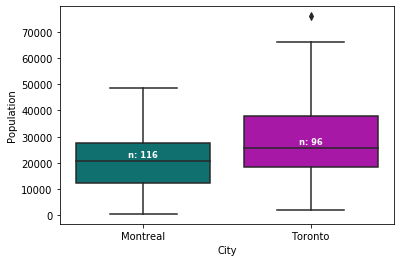

In [58]:
# Population
import seaborn as sns
#df = sns.load_dataset('iris')
my_pal = {"Toronto": "m", "Montreal": "teal"}
pop_graph = sns.boxplot( x=metroToMo_data["City"], y=metroToMo_data["Population"], palette=my_pal, order=['Montreal', 'Toronto'])

# Calculate number of observations per group & median to position labels
medians = metroToMo_data.groupby(['City'])['Population'].median().values
nobs = metroToMo_data['City'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,pop_graph.get_xticklabels()):
    pop_graph.text(pos[tick], medians[tick] + 1500 , nobs[tick],
    horizontalalignment='center', size='small', color='w', weight='bold')

#sns.plt.show()

<h3><b> 6.3. Land Area (km2) Distribution Box Plot</b>

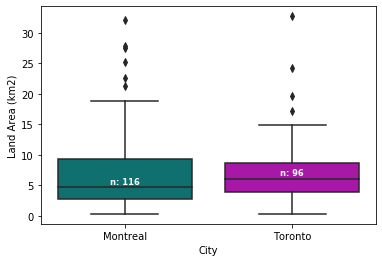

In [59]:
# Land Area
import seaborn as sns
#df = sns.load_dataset('iris')
my_pal = {"Toronto": "m", "Montreal": "teal"}
land_area_graph= sns.boxplot( x=metroToMo_data["City"], y=metroToMo_data["Land Area (km2)"], palette=my_pal,order=['Montreal', 'Toronto'])

# Calculate number of observations per group & median to position labels
medians = metroToMo_data.groupby(['City'])['Land Area (km2)'].median().values
nobs = metroToMo_data['City'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,land_area_graph.get_xticklabels()):
    land_area_graph.text(pos[tick], medians[tick] + 0.6 , nobs[tick],
    horizontalalignment='center', size='small', color='w', weight='bold')

#sns.plt.show()

<h3><b> 6.4. Population Density (people/land area km2) Distribution Box Plot</b>

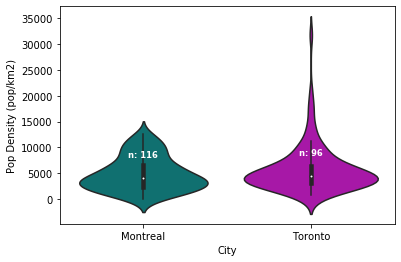

In [60]:
# Population Density
my_pal = {"Toronto": "m", "Montreal": "teal"}
pop_dens_graph = sns.violinplot( x=metroToMo_data["City"], y=metroToMo_data["Pop Density (pop/km2)"], palette=my_pal, order=['Montreal', 'Toronto'])

# Calculate number of observations per group & median to position labels
medians = metroToMo_data.groupby(['City'])['Pop Density (pop/km2)'].median().values
nobs = metroToMo_data['City'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,pop_dens_graph.get_xticklabels()):
    pop_dens_graph.text(pos[tick], medians[tick] + 4000 , nobs[tick],
    horizontalalignment='center', size='small', color='w', weight='bold')

<h3><b>6.5. Median Income of households Distribution Box Plot</b> 

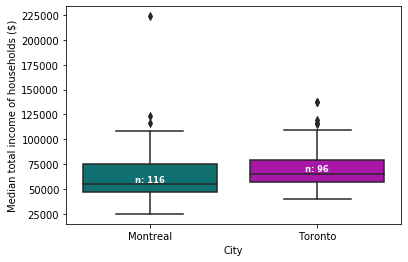

In [63]:
# Median Income
my_pal = {"Toronto": "m", "Montreal": "teal"}
income_graph = sns.boxplot( x=metroToMo_data["City"], y=metroToMo_data["Median total income of households ($)"], palette=my_pal, order=['Montreal', 'Toronto'])

# Calculate number of observations per group & median to position labels
medians = metroToMo_data.groupby(['City'])['Median total income of households ($)'].median().values
nobs = metroToMo_data['City'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,income_graph.get_xticklabels()):
    income_graph.text(pos[tick], medians[tick] + 2800 , nobs[tick],
    horizontalalignment='center', size='small', color='w', weight='bold')
    

<h4><b>Summary</b>

In [70]:
land_pop=metroToMo_data.groupby(['City']).sum()
land_pop = land_pop[['Land Area (km2)','Population']]
land_pop['Pop Density'] = land_pop['Population']/land_pop['Land Area (km2)']
land_pop

Land Area (km2)  Population  Pop Density
City                                              
Montreal  775.75           2365019.0   3048.687077
Toronto   663.36           2732094.0   4118.569103

<h2><b> Part 7: Neighborhood Exploration with Foursquare<b></h2>

<h4> Foursquare Credentials and Version</h4>

In [65]:
# The code was removed by Watson Studio for sharing.

<h4>Foursquare has a category tree found on its website. The main categories from this tree were listed in a csv file saved on the cloud for easy access from our notebook.

In [66]:
Foursquare_MainCateg= 'https://efrenpythonbucket.s3.us.cloud-object-storage.appdomain.cloud/Foursquare_main_categories.csv'
Foursquare_MainCateg = pd.read_csv(Foursquare_MainCateg)
Foursquare_MainCateg

Main Category               Category ID
0  Arts & Entertainment         4d4b7104d754a06370d81259
1  College & University         4d4b7105d754a06372d81259
2  Event                        4d4b7105d754a06373d81259
3  Food                         4d4b7105d754a06374d81259
4  Nightlife Spot               4d4b7105d754a06376d81259
5  Outdoors & Recreation        4d4b7105d754a06377d81259
6  Professional & Other Places  4d4b7105d754a06375d81259
7  Residence                    4e67e38e036454776db1fb3a
8  Shop & Service               4d4b7105d754a06378d81259
9  Travel & Transport           4d4b7105d754a06379d81259

<h4> Defining the function that will loop through the neighborhoods looking for venues falling under the above venue categories.

In [84]:
#def getNearbyVenues(neighborhoods, latitudes, longitudes, reference_code, radius=700, LIMIT=150, search_categoryId):
#def getNearbyVeg(neighborhoods, latitudes, longitudes,reference_code, radius=700, LIMIT=150, search_categoryId ='4bf58dd8d48988d1d3941735'):
def getNearbyVenues(neighbourhoods, latitudes, longitudes,reference_code,search_categoryId, radius=800, LIMIT=150):
    
    venues_list=[]
    for neigh, lat, lng, code in zip(neighbourhoods, latitudes, longitudes, reference_code):
        print(neigh)
            
        # create the API request URL
        
        for Id in search_categoryId:
        
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, Id, radius, LIMIT)
                              
            # make the GET request
            results = requests.get(url).json()["response"]['venues']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                neigh, 
                code,                 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name'],
                v['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ref Neigh', 
                  'Ref Code',                                     
                  'Venue Name', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue ID']
    
    return(nearby_venues)

<h4>Executing the function

In [ ]:
metroToMo_Venues0 = getNearbyVenues(
    
    neighbourhoods=metroToMo_data['Neighbourhood'],
    latitudes=metroToMo_data['Latitude'],
    longitudes=metroToMo_data['Longitude'],
    reference_code=metroToMo_data['Postal Code'],
    search_categoryId = Foursquare_MainCateg['Category ID']
    )

#Give it sometime 
print('Search for nearby venues completed')

<h2><b> Part 8: Cleaning the 'venues data' Fetched from Foursquare</b></h2>

<h3><b> 8.1. Deleating duplicates and saving the data fetched from foursquare for easy access later on when reloading the notebook.</b>

In [110]:
# A fixed-numbered radius(700m) is applied to all our search requests to foursquare; 
# and because of the different dimensions of the area covered by each postal code, 
# we are bound to have overlaping areas covered by the search radius resulting in duplicate venues.

# Deleting duplicates
metroToMo_V2venues1 = metroToMo_Venues0.drop_duplicates(subset ='Venue ID', keep = 'first')
metroToMo_V2venues1.reset_index(inplace=True,drop=True)

# For consistency and time saving reasons I saved df to CSV, which I later upload it to a cloud object storage for easy access when reloading the notebook
# This way we dont have to wait till the search is done (a couple of min), and also maintain the search results consistent.
metroToMo_V2venues1.to_csv('metroToMo_V2venues1_CSV.csv')
          
# Printing the unique venues
print(metroToMo_V2venues1.shape)
metroToMo_V2venues1.head(10)

(31035, 7)


Ref Neigh Ref Code                      Venue Name  \
0  Saint-Laurent Southwest  H4S      WS699                            
1  Saint-Laurent Southwest  H4S      Wolverine                        
2  Saint-Laurent Southwest  H4S      Forever Young Fitness            
3  Saint-Laurent Southwest  H4S      Power Co. Fitness                
4  Saint-Laurent Southwest  H4S      Hypertec Availability Services   
5  Saint-Laurent Southwest  H4S      transForce kabano kingsway       
6  Saint-Laurent Southwest  H4S      Mabarex                          
7  Saint-Laurent Southwest  H4S      Deval Chariots Elévateurs        
8  Saint-Laurent Southwest  H4S      Thermo-Kinetics Montreal         
9  Saint-Laurent Southwest  H4S      ISI Controls                     

   Venue Latitude  Venue Longitude       Venue Category  \
0  45.492591      -73.738293        Dive Bar              
1  45.494101      -73.743502        Sports Bar            
2  45.485466      -73.740494        Gym                   
3  45.488366      -73.742101        Gym                   
4  45.489793      -73.746983        Coworking Space       
5  45.482157      -73.741792        Building              
6  45.485463      -73.744243        Building              
7  45.492836      -73.745285        Distribution Center   
8  45.485955      -73.741390        Building              
9  45.486056      -73.740593        Office                

                   Venue ID  
0  505b6e06e4b0597d27bb072f  
1  4fa831fae4b08bbb90e166e9  
2  51a611b4498e22b8c6ccc70c  
3  4e3b1b1645dd68e3271a3874  
4  4d03033679fd6a31ac337d83  
5  52c5fdac11d24771fe786674  
6  587683e9debdf61058534a4f  
7  5eab0e722eb0690008c6f0de  
8  5281588111d24f3428f0df0e  
9  4fc50233e4b0b59cdf504a1d

<h4>** Loading the copy we saved of the above dataframe above. **

In [85]:
metroToMo_V2venues1_CSV= 'https://efrenpythonbucket.s3.us.cloud-object-storage.appdomain.cloud/metroToMo_V2venues1_CSV.csv'
#'https://efrenpythonbucket.s3.us.cloud-object-storage.appdomain.cloud/metroToMo_Venues1_CSV.csv'
metroToMo_V2venues1_CSV = pd.read_csv(metroToMo_V2venues1_CSV)
metroToMo_V2venues1 = metroToMo_V2venues1_CSV.drop('Unnamed: 0',1)
print(metroToMo_V2venues1.shape)
metroToMo_V2venues1.head(10)

(31035, 7)


Ref Neigh Ref Code                      Venue Name  \
0  Saint-Laurent Southwest  H4S      WS699                            
1  Saint-Laurent Southwest  H4S      Wolverine                        
2  Saint-Laurent Southwest  H4S      Forever Young Fitness            
3  Saint-Laurent Southwest  H4S      Power Co. Fitness                
4  Saint-Laurent Southwest  H4S      Hypertec Availability Services   
5  Saint-Laurent Southwest  H4S      transForce kabano kingsway       
6  Saint-Laurent Southwest  H4S      Mabarex                          
7  Saint-Laurent Southwest  H4S      Deval Chariots Elévateurs        
8  Saint-Laurent Southwest  H4S      Thermo-Kinetics Montreal         
9  Saint-Laurent Southwest  H4S      ISI Controls                     

   Venue Latitude  Venue Longitude       Venue Category  \
0  45.492591      -73.738293        Dive Bar              
1  45.494101      -73.743502        Sports Bar            
2  45.485466      -73.740494        Gym                   
3  45.488366      -73.742101        Gym                   
4  45.489793      -73.746983        Coworking Space       
5  45.482157      -73.741792        Building              
6  45.485463      -73.744243        Building              
7  45.492836      -73.745285        Distribution Center   
8  45.485955      -73.741390        Building              
9  45.486056      -73.740593        Office                

                   Venue ID  
0  505b6e06e4b0597d27bb072f  
1  4fa831fae4b08bbb90e166e9  
2  51a611b4498e22b8c6ccc70c  
3  4e3b1b1645dd68e3271a3874  
4  4d03033679fd6a31ac337d83  
5  52c5fdac11d24771fe786674  
6  587683e9debdf61058534a4f  
7  5eab0e722eb0690008c6f0de  
8  5281588111d24f3428f0df0e  
9  4fc50233e4b0b59cdf504a1d

<h3><b>8.2. Reverse Geocoding

>    As mentioned earlier,  A fixed-numbered radius(700m) is applied to all our search requests to foursquare. Because of the different dimensions of the area covered by each postal code, we were bound to have overlaping areas covered by the search radius, resulting in duplicate venues.

>    For that reason, there were some venues that do not belonged to the postal code it was registered to which is the one used to initialized the search query in the first place. In other words, a venue may not belong to the neighborhood that found it.  

>    Is important that the venues found are correctly assigned to the neighborhood that it belongs to. So, to overcome this problem we will use the venue's latitude and longitude to do a reverse geocode request to get the postal code, and extract its first 3 characters.

 <h4>8.2.1. Defining the function that will be used to execute the reverse geocode request using <i>Geocoder</i> powered by  Bing's API.

In [78]:
# Define the function that will be used to execute the reverse geocode request using Geocoder powered by  Bing's API.

def getPostal(latitudes, longitudes,ref_code,df):
   
    
    venues_list=[]
    for lat, lng, code in zip(latitudes, longitudes,ref_code):
        #print(lat)                   
           
        try:        
        
            g = geocoder.bing([lat, lng], method='reverse', key = bing_key)
        
            postal_digits = g.postal[0:3]
        
            venues_list.append(g.postal[0:3])
        except:
            venues_list.append(code)
        
        print(' .', end='')
    print(' done.')
            

    
    df['Postal Code'] =  venues_list
    

    
    return(df)

<h4>8.2.2. Executing the reverse geocode request using Geocoder powered by Bing's API.

In [88]:
# Executing the reverse geocode request using Geocoder powered by Bing's API.

postal_Venues = getPostal(
    
    latitudes=metroToMo_V2venues1['Venue Latitude'],
    longitudes=metroToMo_V2venues1['Venue Longitude'],
    ref_code = metroToMo_V2venues1['Ref Code'],
    df = metroToMo_V2venues1)

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

<h4>8.2.3. Saving the dataframe with the updated 'Postal Code' column so we can load it without running the geocoder function again. 

In [92]:
print(metroToMo_V2venues1.shape)


metroToMo_V2venues1.to_csv('metroToMo_V2venues1_Postal_CSV.csv')

(print('Dataframe saved'))
metroToMo_V2venues1.head(10)

(31035, 8)
Dataframe saved


Ref Neigh Ref Code                      Venue Name  \
0  Saint-Laurent Southwest  H4S      WS699                            
1  Saint-Laurent Southwest  H4S      Wolverine                        
2  Saint-Laurent Southwest  H4S      Forever Young Fitness            
3  Saint-Laurent Southwest  H4S      Power Co. Fitness                
4  Saint-Laurent Southwest  H4S      Hypertec Availability Services   
5  Saint-Laurent Southwest  H4S      transForce kabano kingsway       
6  Saint-Laurent Southwest  H4S      Mabarex                          
7  Saint-Laurent Southwest  H4S      Deval Chariots Elévateurs        
8  Saint-Laurent Southwest  H4S      Thermo-Kinetics Montreal         
9  Saint-Laurent Southwest  H4S      ISI Controls                     

   Venue Latitude  Venue Longitude       Venue Category  \
0  45.492591      -73.738293        Dive Bar              
1  45.494101      -73.743502        Sports Bar            
2  45.485466      -73.740494        Gym                   
3  45.488366      -73.742101        Gym                   
4  45.489793      -73.746983        Coworking Space       
5  45.482157      -73.741792        Building              
6  45.485463      -73.744243        Building              
7  45.492836      -73.745285        Distribution Center   
8  45.485955      -73.741390        Building              
9  45.486056      -73.740593        Office                

                   Venue ID Postal Code  
0  505b6e06e4b0597d27bb072f  H4R         
1  4fa831fae4b08bbb90e166e9  H4S         
2  51a611b4498e22b8c6ccc70c  H4S         
3  4e3b1b1645dd68e3271a3874  H4S         
4  4d03033679fd6a31ac337d83  H4S         
5  52c5fdac11d24771fe786674  H4S         
6  587683e9debdf61058534a4f  H4S         
7  5eab0e722eb0690008c6f0de  H4S         
8  5281588111d24f3428f0df0e  H4S         
9  4fc50233e4b0b59cdf504a1d  H4S

<h4>8.2.4. **Loading the saved copy of the dataframe containing the reverse geocoding output.**

In [71]:

metroToMo_V2venues1_Postal_CSV= 'https://efrenpythonbucket.s3.us.cloud-object-storage.appdomain.cloud/metroToMo_V2venues1_Postal_CSV.csv'
metroToMo_V2venues1_Postal_CSV = pd.read_csv(metroToMo_V2venues1_Postal_CSV)

#Deleting an unnecessary column
metroToMo_V2venues1_Postal = metroToMo_V2venues1_Postal_CSV.drop('Unnamed: 0',1)

print(metroToMo_V2venues1_Postal.shape)
metroToMo_V2venues1_Postal.head()

(31035, 8)


Ref Neigh Ref Code                      Venue Name  \
0  Saint-Laurent Southwest  H4S      WS699                            
1  Saint-Laurent Southwest  H4S      Wolverine                        
2  Saint-Laurent Southwest  H4S      Forever Young Fitness            
3  Saint-Laurent Southwest  H4S      Power Co. Fitness                
4  Saint-Laurent Southwest  H4S      Hypertec Availability Services   

   Venue Latitude  Venue Longitude   Venue Category                  Venue ID  \
0  45.492591      -73.738293        Dive Bar         505b6e06e4b0597d27bb072f   
1  45.494101      -73.743502        Sports Bar       4fa831fae4b08bbb90e166e9   
2  45.485466      -73.740494        Gym              51a611b4498e22b8c6ccc70c   
3  45.488366      -73.742101        Gym              4e3b1b1645dd68e3271a3874   
4  45.489793      -73.746983        Coworking Space  4d03033679fd6a31ac337d83   

  Postal Code  
0  H4R         
1  H4S         
2  H4S         
3  H4S         
4  H4S

<h4>8.2.5. Cleaning our reverse geocoding output.</h4>

<h4>During the reverse geocoding procedure, there were a couple of venues' postal codes that the <i>Geocoder</i> library could not retrieve; a 'NaN' value was given instead. We are replacing those NaN with the value in the 'Ref Code' column, which is the postal code used to conduct the Foursquare venue search that found the venue in question.

In [80]:
metroToMo_V2venues1_Postal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31035 entries, 0 to 31034
Data columns (total 8 columns):
Ref Neigh          31035 non-null object
Ref Code           31035 non-null object
Venue Name         31034 non-null object
Venue Latitude     31035 non-null float64
Venue Longitude    31035 non-null float64
Venue Category     31035 non-null object
Venue ID           31035 non-null object
Postal Code        31035 non-null object
dtypes: float64(2), object(6)
memory usage: 1.9+ MB


<h4>If we compare the 'Ref Code' column with the 'Postal Code' column we can tell which venues were assigned correctly to its postal code and which were mislocate. Remember that the purpose of the reverse geocoding was to correctly assign venues to the neighborhood they truly belong. 

In [72]:
mislocated =metroToMo_V2venues1_Postal.loc[metroToMo_V2venues1_Postal['Postal Code'] != metroToMo_V2venues1_Postal['Ref Code']]
print('There were', mislocated.shape[0], 'mislocated venues')

There were 6807 mislocated venues


<h4>Earlier we identified postal codes where no census data was available. Lets see if there are any venues under those postal codes. 

In [73]:
# We had incomplete census data for the postal codes below and therefore, were deleted earlier
# However, because of the radius size of the search, venues located under these postal codes were picked up. 
# Instead of deleating these venues, these are being reassigned to neighbour postal codes.

Deleted_PostC=['H4T','H4Y','H4Z','H5A','H5B','M7Y','M5L','M5X','M5K','M7A','M5W']

print('There are ' + str(len(metroToMo_V2venues1_Postal [metroToMo_V2venues1_Postal['Postal Code'].isin(Deleted_PostC)])) + ' venues under the deleted postal codes')

# printing the venues under the deleted postal codes 
metroToMo_V2venues1_Postal [metroToMo_V2venues1_Postal['Postal Code'].isin(Deleted_PostC)]



There are 116 venues under the deleted postal codes


Ref Neigh Ref Code  \
278    Downtown  Montreal East                            H3B       
282    Downtown  Montreal East                            H3B       
297    Downtown  Montreal East                            H3B       
304    Downtown  Montreal East                            H3B       
320    Downtown  Montreal East                            H3B       
329    Downtown  Montreal East                            H3B       
331    Downtown  Montreal East                            H3B       
357    Downtown  Montreal East                            H3B       
369    Downtown  Montreal East                            H3B       
390    Downtown  Montreal East                            H3B       
404    Downtown  Montreal East                            H3B       
481    Richmond, Adelaide, King                           M5H       
504    Richmond, Adelaide, King                           M5H       
561    Richmond, Adelaide, King                           M5H       
562    Richmond, Adelaide, King                           M5H       
654    Richmond, Adelaide, King                           M5H       
676    Richmond, Adelaide, King                           M5H       
694    Richmond, Adelaide, King                           M5H       
698    Richmond, Adelaide, King                           M5H       
699    Richmond, Adelaide, King                           M5H       
702    Richmond, Adelaide, King                           M5H       
709    Richmond, Adelaide, King                           M5H       
711    Richmond, Adelaide, King                           M5H       
713    Richmond, Adelaide, King                           M5H       
716    Richmond, Adelaide, King                           M5H       
804    Richmond, Adelaide, King                           M5H       
827    Richmond, Adelaide, King                           M5H       
846    Richmond, Adelaide, King                           M5H       
902    Downtown  Montreal Northeast                       H2Z       
916    Downtown  Montreal Northeast                       H2Z       
934    Downtown  Montreal Northeast                       H2Z       
992    Downtown  Montreal Northeast                       H2Z       
1031   Downtown  Montreal Northeast                       H2Z       
1037   Downtown  Montreal Northeast                       H2Z       
1043   Downtown  Montreal Northeast                       H2Z       
1057   Downtown  Montreal Northeast                       H2Z       
1058   Downtown  Montreal Northeast                       H2Z       
1073   St. James Town                                     M5C       
1137   St. James Town                                     M5C       
1149   St. James Town                                     M5C       
1152   St. James Town                                     M5C       
1161   St. James Town                                     M5C       
1200   St. James Town                                     M5C       
1232   Old  Montreal                                      H2Y       
1302   Old  Montreal                                      H2Y       
1304   Old  Montreal                                      H2Y       
1339   Old  Montreal                                      H2Y       
1342   Old  Montreal                                      H2Y       
1345   Old  Montreal                                      H2Y       
1347   Old  Montreal                                      H2Y       
1349   Old  Montreal                                      H2Y       
1350   Old  Montreal                                      H2Y       
1450   Dorval Outskirts                                   H9P       
1453   Dorval Outskirts                                   H9P       
1463   Dorval Outskirts                                   H9P       
1468   Dorval Outskirts                                   H9P       
2222   Mount  Royal South                                 H4P       
2272   Mount  Royal South                    

<h4>We are going to re-assign the above venues to neighbor postal codes.

In [74]:
# Replacing postal codes
Deleted_PostC=['H4T','H4Y','H4Z','H5A','H5B','M7Y','M5L','M5X','M5K','M7A','M5W']


metroToMo_V2venues1_Postal.loc[metroToMo_V2venues1_Postal['Postal Code'].isin(Deleted_PostC), 'Postal Code' ] = metroToMo_V2venues1_Postal['Ref Code']

print( 'Number of venues under the deleted postal codes: ' + str(len(metroToMo_V2venues1_Postal [metroToMo_V2venues1_Postal['Postal Code'].isin(Deleted_PostC)])) )

metroToMo_V2venues1_Postal [metroToMo_V2venues1_Postal['Postal Code'].isin(Deleted_PostC)]

Number of venues under the deleted postal codes: 0


Empty DataFrame
Columns: [Ref Neigh, Ref Code, Venue Name, Venue Latitude, Venue Longitude, Venue Category, Venue ID, Postal Code]
Index: []

<h4>Excluding any venues that might have been picked up from neighbor cities outside toronto or montreal.

> For Example: there was a venue that its postal code started wiht the letter 'L'; 'L' is for the city of Mississauga.

In [75]:
# Excluding venues that might have been picked up under postal codes outside our metropolitan cities. 
# That means we keep only venues under postal codes starting with 'H' for Montreal or 'M' for Toronto.
metroToMo_V2venues2_Postal  = metroToMo_V2venues1_Postal[metroToMo_V2venues1_Postal['Postal Code'].astype(str).str.startswith(('H','M'))]

print(metroToMo_V2venues2_Postal.shape)
print('There are ' + str(len(metroToMo_V2venues2_Postal['Postal Code'].unique())) + ' unique postal codes')
metroToMo_V2venues2_Postal.head()

(31034, 8)
There are 212 unique postal codes


Ref Neigh Ref Code                      Venue Name  \
0  Saint-Laurent Southwest  H4S      WS699                            
1  Saint-Laurent Southwest  H4S      Wolverine                        
2  Saint-Laurent Southwest  H4S      Forever Young Fitness            
3  Saint-Laurent Southwest  H4S      Power Co. Fitness                
4  Saint-Laurent Southwest  H4S      Hypertec Availability Services   

   Venue Latitude  Venue Longitude   Venue Category                  Venue ID  \
0  45.492591      -73.738293        Dive Bar         505b6e06e4b0597d27bb072f   
1  45.494101      -73.743502        Sports Bar       4fa831fae4b08bbb90e166e9   
2  45.485466      -73.740494        Gym              51a611b4498e22b8c6ccc70c   
3  45.488366      -73.742101        Gym              4e3b1b1645dd68e3271a3874   
4  45.489793      -73.746983        Coworking Space  4d03033679fd6a31ac337d83   

  Postal Code  
0  H4R         
1  H4S         
2  H4S         
3  H4S         
4  H4S

<h4>Now that we have correctly assigned the venues to its true postal code, we can delete the 'Ref Code' column and match the new postal code with its respective neighborhood name.


In [76]:
metroToMo_Venues= metroToMo_V2venues2_Postal.drop(['Ref Code','Ref Neigh'], axis=1)
metroToMo_Venues = metroToMo_Venues.merge(metroToMo_data[['Neighbourhood','Borough','Postal Code']],on='Postal Code', how='left')

fixed_columns = list(metroToMo_Venues.columns[-3:]) + list(metroToMo_Venues.columns[0:5])
metroToMo_Venues = metroToMo_Venues[fixed_columns]

print(metroToMo_Venues.shape)
print(len(metroToMo_Venues['Postal Code'].unique()))
metroToMo_Venues.head()

(31034, 8)
212


Postal Code            Neighbourhood Borough  \
0  H4R         Saint-Laurent Central    NaN      
1  H4S         Saint-Laurent Southwest  NaN      
2  H4S         Saint-Laurent Southwest  NaN      
3  H4S         Saint-Laurent Southwest  NaN      
4  H4S         Saint-Laurent Southwest  NaN      

                       Venue Name  Venue Latitude  Venue Longitude  \
0  WS699                           45.492591      -73.738293         
1  Wolverine                       45.494101      -73.743502         
2  Forever Young Fitness           45.485466      -73.740494         
3  Power Co. Fitness               45.488366      -73.742101         
4  Hypertec Availability Services  45.489793      -73.746983         

    Venue Category                  Venue ID  
0  Dive Bar         505b6e06e4b0597d27bb072f  
1  Sports Bar       4fa831fae4b08bbb90e166e9  
2  Gym              51a611b4498e22b8c6ccc70c  
3  Gym              4e3b1b1645dd68e3271a3874  
4  Coworking Space  4d03033679fd6a31ac337d83

<h2><b>Part: 9 Venues per Neighborhood - Feature

<h3><b>9.1 Calculating 'Venues per Neighborhood' (Each postal code is considered a neighborhood).

In [77]:
# Venues per postal code
vpp = metroToMo_Venues.groupby('Postal Code').count()
vpp.rename(columns={'Venue Name':'Number of Venues'},inplace=True)
venues_per_postalcode = vpp [['Number of Venues']].reset_index()


venues_per_postalcode = venues_per_postalcode.merge(metroToMo_data[['Neighbourhood','City','Postal Code']],on='Postal Code', how='left')

print(venues_per_postalcode.shape)
venues_per_postalcode.head()

(212, 4)


Postal Code  Number of Venues                   Neighbourhood      City
0  H1A         43                Pointe-aux-Trembles             Montreal
1  H1B         39                Montreal  East                  Montreal
2  H1C         9                 Rivière-des-Prairies Northeast  Montreal
3  H1E         79                Rivière-des-Prairies Southwest  Montreal
4  H1G         132               Montréal-Nord North             Montreal

<h4>Identifying neighborhoods that have less than 5 venues.

In [78]:
# Identify the neighbourhoods where 4 or less venues were found
venues_per_postalcode ['Number of Venues'].astype(int)
#venues_per_neighborhood.dtypes
 
not_enough_venues = venues_per_postalcode [(venues_per_postalcode ['Number of Venues'] < 5)].reset_index(drop = True)
not_enough_venues

Postal Code  Number of Venues           Neighbourhood      City
0  H7B         1                 Saint-François          Montreal
1  H7J         1                 Auteuil Northeast       Montreal
2  H9E         2                 L'Île-Bizard Southwest  Montreal

<h4>Dropping neighbourhoods that have less than 5 venues out of the analysis.

In [79]:
metroToMo_Venues = metroToMo_Venues [~metroToMo_Venues['Postal Code'].isin(not_enough_venues ['Postal Code'])]
metroToMo_Venues.reset_index(inplace=True, drop=True)
print('Dataframe shape after deleting the items.')
print(metroToMo_Venues.shape)
print('There are {} unique venue categories.'.format(len(metroToMo_Venues['Venue Category'].unique())))
metroToMo_Venues.head()

Dataframe shape after deleting the items.
(31030, 8)
There are 619 unique venue categories.


Postal Code            Neighbourhood Borough  \
0  H4R         Saint-Laurent Central    NaN      
1  H4S         Saint-Laurent Southwest  NaN      
2  H4S         Saint-Laurent Southwest  NaN      
3  H4S         Saint-Laurent Southwest  NaN      
4  H4S         Saint-Laurent Southwest  NaN      

                       Venue Name  Venue Latitude  Venue Longitude  \
0  WS699                           45.492591      -73.738293         
1  Wolverine                       45.494101      -73.743502         
2  Forever Young Fitness           45.485466      -73.740494         
3  Power Co. Fitness               45.488366      -73.742101         
4  Hypertec Availability Services  45.489793      -73.746983         

    Venue Category                  Venue ID  
0  Dive Bar         505b6e06e4b0597d27bb072f  
1  Sports Bar       4fa831fae4b08bbb90e166e9  
2  Gym              51a611b4498e22b8c6ccc70c  
3  Gym              4e3b1b1645dd68e3271a3874  
4  Coworking Space  4d03033679fd6a31ac337d83

<h4>Updating <b>metroToMo_data</b> dataframe by removing the postal codes where less than 5 venues were found.

In [80]:
metroToMo_data = metroToMo_data [~metroToMo_data['Postal Code'].isin(not_enough_venues ['Postal Code'])]
metroToMo_data.reset_index(inplace=True, drop=True)
print('Dataframe shape after deleting the items.')
print(metroToMo_data.shape)
metroToMo_data.head(2)

Dataframe shape after deleting the items.
(209, 11)


Postal Code          Borough  \
0  M4V         Central Toronto   
1  M4N         Central Toronto   

                                                       Neighbourhood  \
0  Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park   
1  Lawrence Park                                                       

    Latitude  Longitude     City Province  Land Area (km2)  Population  \
0  43.686405 -79.401665  Toronto  ON       2.87             18241.0      
1  43.727158 -79.397041  Toronto  ON       6.52             15330.0      

   Median total income of households ($)  Pop Density (pop/km2)  
0  85487.0                                6355.75                
1  137758.0                               2351.23

In [81]:
print('There are {} unique categories.'.format(len(metroToMo_Venues['Venue Category'].unique())))

There are 619 unique categories.


<h4>Analyzing 'venues per neighbourhood' now that neighbourhoods with less than 5 venues were dropped.

In [82]:
    
vpn = metroToMo_Venues.groupby('Postal Code').count()
vpn.rename(columns={'Venue Name':'# of Venues per Neigh'},inplace=True)
venues_per_postalcode = vpn [['# of Venues per Neigh']].reset_index()

venues_per_postalcode = venues_per_postalcode.merge(metroToMo_data[['Neighbourhood','City','Postal Code']],on='Postal Code', how='left')

print(venues_per_postalcode.shape)
venues_per_postalcode.head()

(209, 4)


Postal Code  # of Venues per Neigh                   Neighbourhood      City
0  H1A         43                     Pointe-aux-Trembles             Montreal
1  H1B         39                     Montreal  East                  Montreal
2  H1C         9                      Rivière-des-Prairies Northeast  Montreal
3  H1E         79                     Rivière-des-Prairies Southwest  Montreal
4  H1G         132                    Montréal-Nord North             Montreal

<h3><b>9.2. Calculating Venues Density - Feature

<h4>Calculating Venues Density, and updating metroToMo_data dataframe by adding a number of venues per neighborhood column, and a venues density column. 

In [83]:
# Updating metroToMo_data dataframe by adding the number of venues per neighborhood column
metroToMo_data = metroToMo_data.merge(venues_per_postalcode[['# of Venues per Neigh','Postal Code']],on='Postal Code', how='left')

# Adding a venues density column 
metroToMo_data['Venues Density (# of venues/km2)'] = metroToMo_data['# of Venues per Neigh'] / metroToMo_data['Land Area (km2)']

print(metroToMo_data.shape)
metroToMo_data.head()

(209, 13)


Postal Code          Borough  \
0  M4V         Central Toronto   
1  M4N         Central Toronto   
2  M4T         Central Toronto   
3  M4S         Central Toronto   
4  M5N         Central Toronto   

                                                       Neighbourhood  \
0  Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park   
1  Lawrence Park                                                       
2  Moore Park, Summerhill East                                         
3  Davisville                                                          
4  Roselawn                                                            

    Latitude  Longitude     City Province  Land Area (km2)  Population  \
0  43.686405 -79.401665  Toronto  ON       2.87             18241.0      
1  43.727158 -79.397041  Toronto  ON       6.52             15330.0      
2  43.687790 -79.388641  Toronto  ON       2.18             10463.0      
3  43.703209 -79.390472  Toronto  ON       2.77             26506.0      
4  43.710556 -79.419601  Toronto  ON       2.77             16610.0      

   Median total income of households ($)  Pop Density (pop/km2)  \
0  85487.0                                6355.75                 
1  137758.0                               2351.23                 
2  96571.0                                4799.54                 
3  75520.0                                9568.95                 
4  94106.0                                5996.39                 

   # of Venues per Neigh  Venues Density (# of venues/km2)  
0  184                    64.111498                         
1  160                    24.539877                         
2  184                    84.403670                         
3  238                    85.920578                         
4  123                    44.404332

<h4>Plotting Venues Density

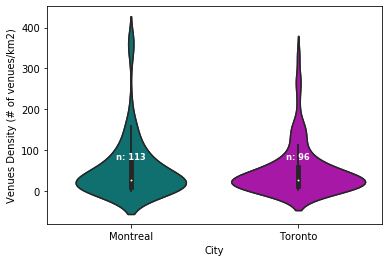

In [84]:
# Venue density
my_pal = {"Toronto": "m", "Montreal": "teal"}
ven_dens_graph = sns.violinplot( x=metroToMo_data["City"], y=metroToMo_data["Venues Density (# of venues/km2)"], palette=my_pal, order=['Montreal', 'Toronto'])

# Calculate number of observations per group & median to position labels
medians = metroToMo_data.groupby(['City'])['Venues Density (# of venues/km2)'].median().values
nobs = metroToMo_data['City'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ven_dens_graph.get_xticklabels()):
    ven_dens_graph.text(pos[tick], medians[tick] + 50 , nobs[tick],
    horizontalalignment='center', size='small', color='w', weight='bold')
my_pal = {"Toronto": "m", "Montreal": "teal"}
ven_dens_graph = sns.violinplot( x=metroToMo_data["City"], y=metroToMo_data["Venues Density (# of venues/km2)"], palette=my_pal, order=['Montreal', 'Toronto'])



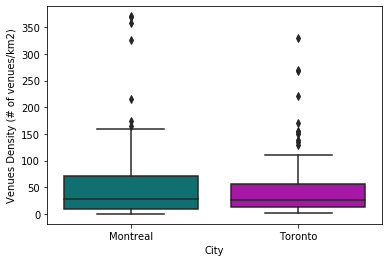

In [100]:
# Venues density
my_pal = {"Toronto": "m", "Montreal": "teal"}
ven_dens_graph = sns.boxplot( x=metroToMo_data["City"], y=metroToMo_data["Venues Density (# of venues/km2)"], palette=my_pal, order=['Montreal', 'Toronto'])

In [101]:
venues_per_postalcode.describe()

# of Venues per Neigh
count  209.000000           
mean   148.464115           
std    88.460008            
min    5.000000             
25%    84.000000            
50%    132.000000           
75%    195.000000           
max    427.000000

In [102]:
venues_per_postalcode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 4 columns):
Postal Code              209 non-null object
# of Venues per Neigh    209 non-null int64
Neighbourhood            209 non-null object
City                     209 non-null object
dtypes: int64(1), object(3)
memory usage: 8.2+ KB


<h4> Plotting # of Venues per Neighborhood

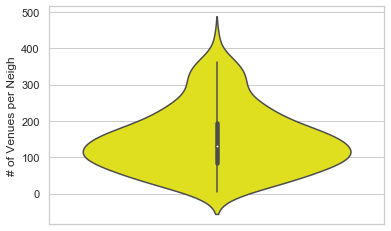

In [104]:
sns.violinplot( y=venues_per_postalcode["# of Venues per Neigh"],color='yellow')

#plt.show()

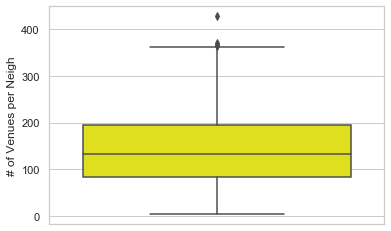

In [105]:
sns.set(style="whitegrid")
vpn_graph = sns.boxplot(y=venues_per_postalcode["# of Venues per Neigh"], color='yellow')


In [106]:
metroToMo_Venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31030 entries, 0 to 31029
Data columns (total 8 columns):
Postal Code        31030 non-null object
Neighbourhood      31030 non-null object
Borough            15966 non-null object
Venue Name         31029 non-null object
Venue Latitude     31030 non-null float64
Venue Longitude    31030 non-null float64
Venue Category     31030 non-null object
Venue ID           31030 non-null object
dtypes: float64(2), object(6)
memory usage: 1.9+ MB


Checking NaN values under the median income column.

<h2><b>Part 10: Preparing Data for Segmenting and Clustering</b> </h2> 
<h3><b> 10.1. One Hot Encoding </b></h3> 
<h4> Lets analyze each neighborhood. </h4> 

In [85]:
# one hot encoding
metroToMo_onehot = pd.get_dummies(metroToMo_Venues[['Venue Category']], prefix="", prefix_sep="")

# adding the neighborhood columns back to the dataframe.
metroToMo_onehot['Postal Code'] = metroToMo_Venues['Postal Code']
metroToMo_onehot['Neighbourhood'] = metroToMo_Venues['Neighbourhood'] 
 
#metroTO_onehot['Borough'] = metroTO_venues['Borough'] 


# Rearranging the order of the columns
fixed_columns = [metroToMo_onehot.columns[-1]] + [metroToMo_onehot.columns[-2]] + list(metroToMo_onehot.columns[:-2])
metroToMo_onehot = metroToMo_onehot[fixed_columns]

print('Dataframe shape: ' + str(metroToMo_onehot.shape))
metroToMo_onehot.head(10)

Dataframe shape: (31030, 621)


Neighbourhood Postal Code  ATM  Accessories Store  Acupuncturist  \
0  Saint-Laurent Central    H4R         0    0                  0               
1  Saint-Laurent Southwest  H4S         0    0                  0               
2  Saint-Laurent Southwest  H4S         0    0                  0               
3  Saint-Laurent Southwest  H4S         0    0                  0               
4  Saint-Laurent Southwest  H4S         0    0                  0               
5  Saint-Laurent Southwest  H4S         0    0                  0               
6  Saint-Laurent Southwest  H4S         0    0                  0               
7  Saint-Laurent Southwest  H4S         0    0                  0               
8  Saint-Laurent Southwest  H4S         0    0                  0               
9  Saint-Laurent Southwest  H4S         0    0                  0               

   Adult Boutique  Adult Education Center  Advertising Agency  \
0  0               0                       0                    
1  0               0                       0                    
2  0               0                       0                    
3  0               0                       0                    
4  0               0                       0                    
5  0               0                       0                    
6  0               0                       0                    
7  0               0                       0                    
8  0               0                       0                    
9  0               0                       0                    

   Afghan Restaurant  African Restaurant  Airport  Airport Gate  \
0  0                  0                   0        0              
1  0                  0                   0        0              
2  0                  0                   0        0              
3  0                  0                   0        0              
4  0                  0                   0        0              
5  0                  0                   0        0              
6  0                  0                   0        0              
7  0                  0                   0        0              
8  0                  0                   0        0              
9  0                  0                   0        0              

   Airport Lounge  Airport Terminal  Alternative Healer  American Restaurant  \
0  0               0                 0                   0                     
1  0               0                 0                   0                     
2  0               0                 0                   0                     
3  0               0                 0                   0                     
4  0               0                 0                   0                     
5  0               0                 0                   0                     
6  0               0                 0                   0                     
7  0               0                 0                   0                     
8  0               0                 0                   0                     
9  0               0                 0                   0                     

   Amphitheater  Animal Shelter  Antique Shop  Apres Ski Bar  Aquarium  \
0  0             0               0             0              0          
1  0             0               0             0              0          
2  0             0               0             0              0          
3  0             0               0             0              0          
4  0             0               0             0              0          
5  0             0               0             0              0          
6  0             0               0             0              0          
7  0             0               0             0              0          
8  0             0               0             0              0          
9  0             0               0            

<h3><b>10.2. Consolidating and Normalizing the Values of the features</b></h3> 
<h4>Consolidating the rows so all venues for the same neighborhood are shown in one line. 

Normalizing the values of the venue category features
- By taking the <i> <u>mean of the frequency</u> </i>of occurrence of each category.

Normalizing the values of the census features:
- Since our census variables, land area, population, and median income are on different scales, these should be normalized to match the same scale as the venue category variables. 
- For this we will use the Min Max Scaler from the Scikit Learn python library.


In [86]:
# Consolidating and normalizing the venue category features
# The calculation involves adding up all the venues under one category divided by the total number of venues (all categories) found in their corresponding neighborhood
metroToMo_1shot_consol = metroToMo_onehot.groupby(['Postal Code']).mean().reset_index()

# Bringing the census data from the metroToMo_data dataframe
metroToMo_1shot_consol = metroToMo_1shot_consol.merge(metroToMo_data[['Neighbourhood','Pop Density (pop/km2)','Venues Density (# of venues/km2)','Median total income of households ($)','Postal Code']],on='Postal Code', how='left')

# Normalizing the census features - bringing the census data variables to the same scale (0 to 1) of the venue category variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

metroToMo_1shot_consol[['Pop Density (pop/km2)' ,'Venues Density (# of venues/km2)' ,'Median total income of households ($)']] = scaler.fit_transform(metroToMo_1shot_consol[['Pop Density (pop/km2)' ,'Venues Density (# of venues/km2)' ,'Median total income of households ($)']])

# Re-arranging the column order
column_order = [metroToMo_1shot_consol.columns[0]] + list(metroToMo_1shot_consol.columns[-4:]) + list(metroToMo_1shot_consol.columns[1:-4])
metroToMo_1shot_consol = metroToMo_1shot_consol[column_order]

print('Shape of the dataframe: ' + str(metroToMo_1shot_consol.shape))
metroToMo_1shot_consol.head(5)

Shape of the dataframe: (209, 624)


Postal Code                   Neighbourhood  Pop Density (pop/km2)  \
0  H1A         Pointe-aux-Trembles             0.076546                
1  H1B         Montreal  East                  0.052540                
2  H1C         Rivière-des-Prairies Northeast  0.025479                
3  H1E         Rivière-des-Prairies Southwest  0.110722                
4  H1G         Montréal-Nord North             0.192721                

   Venues Density (# of venues/km2)  Median total income of households ($)  \
0  0.008339                          0.189783                                
1  0.008418                          0.143670                                
2  0.000961                          0.312173                                
3  0.017363                          0.181758                                
4  0.044620                          0.090255                                

        ATM  Accessories Store  Acupuncturist  Adult Boutique  \
0  0.000000  0.0                0.0            0.0              
1  0.000000  0.0                0.0            0.0              
2  0.000000  0.0                0.0            0.0              
3  0.012658  0.0                0.0            0.0              
4  0.000000  0.0                0.0            0.0              

   Adult Education Center  Advertising Agency  Afghan Restaurant  \
0  0.0                     0.0                 0.0                 
1  0.0                     0.0                 0.0                 
2  0.0                     0.0                 0.0                 
3  0.0                     0.0                 0.0                 
4  0.0                     0.0                 0.0                 

   African Restaurant  Airport  Airport Gate  Airport Lounge  \
0  0.0                 0.0      0.0           0.0              
1  0.0                 0.0      0.0           0.0              
2  0.0                 0.0      0.0           0.0              
3  0.0                 0.0      0.0           0.0              
4  0.0                 0.0      0.0           0.0              

   Airport Terminal  Alternative Healer  American Restaurant  Amphitheater  \
0  0.0               0.000000            0.0                  0.0            
1  0.0               0.000000            0.0                  0.0            
2  0.0               0.000000            0.0                  0.0            
3  0.0               0.000000            0.0                  0.0            
4  0.0               0.007576            0.0                  0.0            

   Animal Shelter  Antique Shop  Apres Ski Bar  Aquarium  Arcade  \
0  0.0             0.0           0.0            0.0       0.0      
1  0.0             0.0           0.0            0.0       0.0      
2  0.0             0.0           0.0            0.0       0.0      
3  0.0             0.0           0.0            0.0       0.0      
4  0.0             0.0           0.0            0.0       0.0      

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0  0.0               0.0                     0.0          0.0          
1  0.0               0.0                     0.0          0.0          
2  0.0               0.0                     0.0          0.0          
3  0.0               0.0                     0.0          0.0          
4  0.0               0.0                     0.0          0.0          

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0  0.0         0.0                  0.0                   0.000000           
1  0.0         0.0                  0.0                   0.000000           
2  0.0         0.0                  0.0                   0.000000           
3  0.0         0.0                  0.0                   0.000000           
4  0.0         0.0                  0.0                   0.007576           

   Assisted Living  Astrologer  Athletics & Sports  Auditorium  \
0  0.0              0.0         0.000000            0.0          
1  

<h4>Preparing a dataframe with only the features that will be used to feed the K-means clustering algorithm.

In [87]:
OneShot_data = metroToMo_1shot_consol.copy()
OneShot_data = OneShot_data.drop(['Neighbourhood','Postal Code'], 1)

# This is the dataframe that will be used to feed the K-means clustering algorithm
print(OneShot_data.shape)
OneShot_data.head()

(209, 622)


Pop Density (pop/km2)  Venues Density (# of venues/km2)  \
0  0.076546               0.008339                           
1  0.052540               0.008418                           
2  0.025479               0.000961                           
3  0.110722               0.017363                           
4  0.192721               0.044620                           

   Median total income of households ($)       ATM  Accessories Store  \
0  0.189783                               0.000000  0.0                 
1  0.143670                               0.000000  0.0                 
2  0.312173                               0.000000  0.0                 
3  0.181758                               0.012658  0.0                 
4  0.090255                               0.000000  0.0                 

   Acupuncturist  Adult Boutique  Adult Education Center  Advertising Agency  \
0  0.0            0.0             0.0                     0.0                  
1  0.0            0.0             0.0                     0.0                  
2  0.0            0.0             0.0                     0.0                  
3  0.0            0.0             0.0                     0.0                  
4  0.0            0.0             0.0                     0.0                  

   Afghan Restaurant  African Restaurant  Airport  Airport Gate  \
0  0.0                0.0                 0.0      0.0            
1  0.0                0.0                 0.0      0.0            
2  0.0                0.0                 0.0      0.0            
3  0.0                0.0                 0.0      0.0            
4  0.0                0.0                 0.0      0.0            

   Airport Lounge  Airport Terminal  Alternative Healer  American Restaurant  \
0  0.0             0.0               0.000000            0.0                   
1  0.0             0.0               0.000000            0.0                   
2  0.0             0.0               0.000000            0.0                   
3  0.0             0.0               0.000000            0.0                   
4  0.0             0.0               0.007576            0.0                   

   Amphitheater  Animal Shelter  Antique Shop  Apres Ski Bar  Aquarium  \
0  0.0           0.0             0.0           0.0            0.0        
1  0.0           0.0             0.0           0.0            0.0        
2  0.0           0.0             0.0           0.0            0.0        
3  0.0           0.0             0.0           0.0            0.0        
4  0.0           0.0             0.0           0.0            0.0        

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0  0.0     0.0               0.0                     0.0          0.0          
1  0.0     0.0               0.0                     0.0          0.0          
2  0.0     0.0               0.0                     0.0          0.0          
3  0.0     0.0               0.0                     0.0          0.0          
4  0.0     0.0               0.0                     0.0          0.0          

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0  0.0         0.0                  0.0                   0.000000           
1  0.0         0.0                  0.0                   0.000000           
2  0.0         0.0                  0.0                   0.000000           
3  0.0         0.0                  0.0                   0.000000           
4  0.0         0.0                  0.0                   0.007576           

   Assisted Living  Astrologer  Athletics & Sports  Auditorium  \
0  0.0              0.0         0.000000            0.0          
1  0.0              0.0         0.000000            0.0          
2  0.0              0.0         0.000000            0.0          
3  0.0              0.0         0.012658            0.0          
4  0.0              0.0         0.000000            0.0          

   Australian Restaurant  Auto Dea

<h2><b>Part 11: Clustering Neighborhoods</b> </h2> 

<h3><b>11.1. Elbow method to asses what is the optimal <i>number of clusters (k)</i> to be set when clustering </h3>

In [88]:
# 1. Using the elbow method to find out the optimal number of clusters. 

# Within-Cluster-Sum-of-Squares (WCSS)
wcss=[]

# the below loop will fit the k-means algorithm to our data 
# then we will compute the within cluster sum of squares and appended to our wcss list.

for i in range(1,10): 
    k_means = KMeans(n_clusters= i, init ='k-means++', max_iter=300,  n_init=6, random_state=0)
        
# i indicates that the test will check the performance and efficiency of having between 1-10 number of clusters.
# init: initialization method of centroids. 
# k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
# max_iter parameter the maximum number of iterations there can be to 
# find the final clusters when the K-meands algorithm is running. 
# we entered the default value of 300
# n_init is the number of times the K_means algorithm will be run with different initial centroids.

#kmeans algorithm fits to the X dataset
    k_means.fit(OneShot_data)
    
# kmeans inertia_ attribute is the Sum of squared distances of the samples to their closest cluster center.
    wcss.append([k_means.inertia_])

# kmeans inertia_ attribute is the sum of squares of distance between data points 
# and respective centroid of the cluster to which the data point belongs.



<h4>Elbow method graph

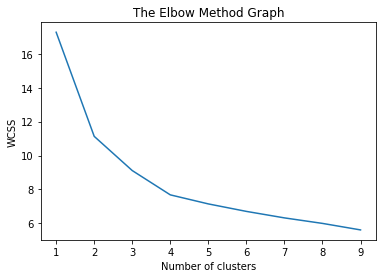

In [89]:
# 2. Plot the elbow graph

import matplotlib.pyplot as plt 
import numpy as np 

plt.plot(range(1,10),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h3><b>11.2. Clustering Analysis</b></h3>
<h4>Lets run the algorithm and print out the cluster labels </h4>
    
<h4>Acoording to the elbow method, a <b>k</b> of 4 is appropriate. let's run the k-means algorithm to segment the neighborhoods into 4 clusters.

In [90]:
# set number of clusters
kclusters = 4

# run k-means clustering
k_means1 = KMeans(n_clusters=kclusters, init ='k-means++', max_iter=300, n_init=12, random_state=3).fit(OneShot_data)

# check cluster labels generated for each row in the dataframe
k_means_labels = k_means1.labels_ 
k_means_labels

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 2, 3, 0,
       2, 1, 1, 3, 3, 3, 1, 0, 0, 1, 2, 3, 1, 3, 0, 1, 1, 3, 1, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0,
       3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0,
       3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3,
       1, 3, 3, 0, 1, 0, 1, 0, 0, 0, 1, 2, 3, 2, 1, 1, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 0, 3, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3])

<h2> <b>Part 12: Neighborhoods' top 10 Venue Categories</b></h2>

<h3><b>12.1 Creating a dataframe containing the top 10 venue categories for each neighborhood.</b>
    <h4><b>Step 1</b>: We don't want our census data be part of the venue categories ranking so we create a new dataframe without them. 

In [92]:
# We don't want our census data to be part of the venues categories ranking so we create a new dataframe without it 
Top_10 = OneShot_data.copy()
Top_10['Postal Code'] = metroToMo_1shot_consol['Postal Code']
Top_10['Neighbourhood'] = metroToMo_1shot_consol['Neighbourhood']
Top_10 = Top_10.drop(['Pop Density (pop/km2)','Venues Density (# of venues/km2)' ,'Median total income of households ($)'], axis=1)

# Rearranging the order of the columns
fixed_columns = [Top_10.columns[-1]] + [Top_10.columns[-2]] + list(Top_10.columns[:-2])
Top_10 = Top_10[fixed_columns]

print(Top_10.shape)
Top_10.head()


(209, 621)


Neighbourhood Postal Code       ATM  Accessories Store  \
0  Pointe-aux-Trembles             H1A         0.000000  0.0                 
1  Montreal  East                  H1B         0.000000  0.0                 
2  Rivière-des-Prairies Northeast  H1C         0.000000  0.0                 
3  Rivière-des-Prairies Southwest  H1E         0.012658  0.0                 
4  Montréal-Nord North             H1G         0.000000  0.0                 

   Acupuncturist  Adult Boutique  Adult Education Center  Advertising Agency  \
0  0.0            0.0             0.0                     0.0                  
1  0.0            0.0             0.0                     0.0                  
2  0.0            0.0             0.0                     0.0                  
3  0.0            0.0             0.0                     0.0                  
4  0.0            0.0             0.0                     0.0                  

   Afghan Restaurant  African Restaurant  Airport  Airport Gate  \
0  0.0                0.0                 0.0      0.0            
1  0.0                0.0                 0.0      0.0            
2  0.0                0.0                 0.0      0.0            
3  0.0                0.0                 0.0      0.0            
4  0.0                0.0                 0.0      0.0            

   Airport Lounge  Airport Terminal  Alternative Healer  American Restaurant  \
0  0.0             0.0               0.000000            0.0                   
1  0.0             0.0               0.000000            0.0                   
2  0.0             0.0               0.000000            0.0                   
3  0.0             0.0               0.000000            0.0                   
4  0.0             0.0               0.007576            0.0                   

   Amphitheater  Animal Shelter  Antique Shop  Apres Ski Bar  Aquarium  \
0  0.0           0.0             0.0           0.0            0.0        
1  0.0           0.0             0.0           0.0            0.0        
2  0.0           0.0             0.0           0.0            0.0        
3  0.0           0.0             0.0           0.0            0.0        
4  0.0           0.0             0.0           0.0            0.0        

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0  0.0     0.0               0.0                     0.0          0.0          
1  0.0     0.0               0.0                     0.0          0.0          
2  0.0     0.0               0.0                     0.0          0.0          
3  0.0     0.0               0.0                     0.0          0.0          
4  0.0     0.0               0.0                     0.0          0.0          

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0  0.0         0.0                  0.0                   0.000000           
1  0.0         0.0                  0.0                   0.000000           
2  0.0         0.0                  0.0                   0.000000           
3  0.0         0.0                  0.0                   0.000000           
4  0.0         0.0                  0.0                   0.007576           

   Assisted Living  Astrologer  Athletics & Sports  Auditorium  \
0  0.0              0.0         0.000000            0.0          
1  0.0              0.0         0.000000            0.0          
2  0.0              0.0         0.000000            0.0          
3  0.0              0.0         0.012658            0.0          
4  0.0              0.0         0.000000            0.0          

   Australian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0  0.0                    0.000000         0.0          0.0             
1  0.0                    0.000000         0.0          0.0             
2  0.0                    0.000000         0.0          0.0             
3  0.0                    0.000000         0.0          0.0             
4  0.0                    0.0

<h4><b>Step 2:</b> Create the function that is going to retrieve and arrange the top 10 venue categories from each neightborhood in descending order. 
<h4> The below function that will return the first 10 most common venue category name for each neighborhood. 

In [93]:
def return_most_common_venues(row, cols):

    # Selects the row values
    row_values = row.iloc[2:]

    # Sorts the selected row values
    #  [-cols:] returns the 10 largest values in ascending order, the [::-1] part reverses the order.
    row_values_sorted = row_values[np.argsort(row_values)[-cols:]][::-1]

    # Returns the column name of the first 10 sorted values 
    return [index if value > 0 and value != np.nan else "Not Available" for index, value in zip(row_values_sorted.index, row_values_sorted.values)]



<h4>This function will arrange the top venue category names per neighborhood on a dataframe and give proper column lables depending on how many rankings you want to display.

In [94]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Postal Code'] = Top_10['Postal Code']

# metroToMo_grouped.shape[0] = # of rows
# ind = row index
for ind in np.arange(Top_10.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Top_10.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head(10)

Postal Code 1st Most Common Venue 2nd Most Common Venue  \
0  H1A         Park                  Pharmacy               
1  H1B         Restaurant            Factory                
2  H1C         Park                  Building               
3  H1E         Italian Restaurant    Dentist's Office       
4  H1G         Restaurant            Fast Food Restaurant   
5  H1H         Fast Food Restaurant  Salon / Barbershop     
6  H1J         Office                Building               
7  H1K         Park                  Bus Stop               
8  H1L         Automotive Shop       Restaurant             
9  H1M         Park                  Building               

  3rd Most Common Venue   4th Most Common Venue  \
0  Bus Line              Car Wash                 
1  Building              Furniture / Home Store   
2  Train Station         Tram Station             
3  Office                Bus Stop                 
4  Government Building   Pharmacy                 
5  Bank                  Pharmacy                 
6  Factory               Pharmacy                 
7  Bus Line              Medical Center           
8  Breakfast Spot        Bus Line                 
9  Salon / Barbershop    Pizza Place              

                      5th Most Common Venue 6th Most Common Venue  \
0  Train Station                             Library                
1  Bus Line                                  Government Building    
2  Bus Stop                                  Not Available          
3  Laundry Service                           Salon / Barbershop     
4  Residential Building (Apartment / Condo)  Discount Store         
5  Church                                    Pizza Place            
6  Bus Stop                                  Sporting Goods Shop    
7  Building                                  Pharmacy               
8  Grocery Store                             Salon / Barbershop     
9  Residential Building (Apartment / Condo)  Office                 

                      7th Most Common Venue   8th Most Common Venue  \
0  Bus Stop                                  Elementary School        
1  Residential Building (Apartment / Condo)  Rental Car Location      
2  Not Available                             Not Available            
3  Bank                                      Pizza Place              
4  Bank                                      Bus Line                 
5  Restaurant                                Factory                  
6  Breakfast Spot                            Furniture / Home Store   
7  Dentist's Office                          Doctor's Office          
8  Residential Building (Apartment / Condo)  Baseball Field           
9  Bus Stop                                  Pharmacy                 

  9th Most Common Venue 10th Most Common Venue  
0  School                Bus Station            
1  Automotive Shop       Bar                    
2  Not Available         Not Available          
3  Government Building   School                 
4  Sandwich Place        Medical Center         
5  Convenience Store     Office                 
6  Coffee Shop           Salon / Barbershop     
7  Dance Studio          Salon / Barbershop     
8  Church                Dentist's Office       
9  Fast Food Restaurant  Dentist's Office

<h3><b>12.2. Assigning Neighborhoods their Custer Label.</b></h3>

<h3>
* Adding as well other data we want to see displayed together with the neighborhood's top 10 venue categories

In [95]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', k_means1.labels_)

# Lets also add latitude, longitude, Borough, city, province for each neighborhood by merging it with our metroToMo_data dataframe. 
metroToMo_top10 = neighbourhoods_venues_sorted.copy()

metroToMo_top10 = metroToMo_top10.merge(metroToMo_data, on='Postal Code', how='left')

#metroToMo_top10 = metroToMo_top10.merge(metroToMo_data[['Postal Code','Borough','Neighbourhood','City','Province','Latitude','Longitude','Median total income of households ($)','Pop Density (pop/km2)','Venues Density (# of venues/km2)']], on='Postal Code', how='left')

# metroToMo_top10 = metroToMo_top10.join(metroToMo_data.set_index('Postal Code'), on='Postal Code')

# Adding a population density column 
#metroToMo_top10['Pop Density (pop/km2)'] = metroToMo_top10['Population'] / metroToMo_top10['Land Area (km2)']
#metroToMo_top10['Pop Density (pop/km2)'] = metroToMo_top10['Pop Density (pop/km2)'].round(2)

# Re-arranging the columns 
columns_order = [metroToMo_top10.columns[1]] + [metroToMo_top10.columns[0]] + list(metroToMo_top10.columns[12 :]) + list(metroToMo_top10.columns[2:12])
metroToMo_top10 = metroToMo_top10 [columns_order]

In [96]:
print(metroToMo_top10.shape)
metroToMo_top10.head(10)

(209, 24)


Postal Code  Cluster Labels Borough                   Neighbourhood  \
0  H1A         3               NaN     Pointe-aux-Trembles              
1  H1B         3               NaN     Montreal  East                   
2  H1C         0               NaN     Rivière-des-Prairies Northeast   
3  H1E         3               NaN     Rivière-des-Prairies Southwest   
4  H1G         3               NaN     Montréal-Nord North              
5  H1H         3               NaN     Montréal-Nord South              
6  H1J         3               NaN     Anjou West                       
7  H1K         3               NaN     Anjou East                       
8  H1L         3               NaN     Mercier North                    
9  H1M         3               NaN     Mercier West                     

   Latitude  Longitude      City Province  Land Area (km2)  Population  \
0  45.6753  -73.5016    Montreal  QC       13.25            32516.0      
1  45.6320  -73.5075    Montreal  QC       11.91            20160.0      
2  45.6656  -73.5367    Montreal  QC       17.59            14678.0      
3  45.6342  -73.5842    Montreal  QC       11.99            42420.0      
4  45.6109  -73.6211    Montreal  QC       7.91             48556.0      
5  45.5899  -73.6389    Montreal  QC       4.75             36127.0      
6  45.6097  -73.5794    Montreal  QC       4.63             10308.0      
7  45.6097  -73.5472    Montreal  QC       9.32             34821.0      
8  45.6043  -73.5178    Montreal  QC       8.20             33468.0      
9  45.5883  -73.5572    Montreal  QC       5.10             29359.0      

   Median total income of households ($)  Pop Density (pop/km2)  \
0  62608.0                                2454.04                 
1  53437.0                                1692.70                 
2  86949.0                                834.45                  
3  61012.0                                3537.95                 
4  42814.0                                6138.56                 
5  41965.0                                7605.68                 
6  55186.0                                2226.35                 
7  59465.0                                3736.16                 
8  50298.0                                4081.46                 
9  53956.0                                5756.67                 

   # of Venues per Neigh  Venues Density (# of venues/km2)  \
0  43                     3.245283                           
1  39                     3.274559                           
2  9                      0.511654                           
3  79                     6.588824                           
4  132                    16.687737                          
5  128                    26.947368                          
6  91                     19.654428                          
7  98                     10.515021                          
8  108                    13.170732                          
9  103                    20.196078                          

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Park                  Pharmacy              Bus Line               
1  Restaurant            Factory               Building               
2  Park                  Building              Train Station          
3  Italian Restaurant    Dentist's Office      Office                 
4  Restaurant            Fast Food Restaurant  Government Building    
5  Fast Food Restaurant  Salon / Barbershop    Bank                   
6  Office                Building              Factory                
7  Park                  Bus Stop              Bus Line               
8  Automotive Shop       Restaurant            Breakfast Spot         
9  Park                  Building              Salon / Barbershop     

    4th Most Common Venue                     5th Most Common Venue  \
0  Car Wash                Train Station                              
1  Furniture / Home Store  Bus Line   

<h2><b> Part 13: Visualizing the Resulting Neighborhood Clusters

<h3><b> 13.1 Map of Metropolitan Toronto

In [97]:
# create map
map_clusters = folium.Map(location=[TO_latitude, TO_longitude], zoom_start=11,prefer_canvas = True)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = ['dodgerblue','red','darkviolet','mediumseagreen']
#cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neigh, cluster, post in zip(metroToMo_top10['Latitude'], metroToMo_top10['Longitude'], metroToMo_top10['Neighbourhood'], metroToMo_top10['Cluster Labels'],metroToMo_top10['Postal Code']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster) + " " + str(post), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        weight=2,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

<h3><b> 13.2 Map of Metropolitan Montreal

In [98]:
# create map
map_clusters2 = folium.Map(location=[MO_latitude, MO_longitude], zoom_start=11,prefer_canvas = True)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = ['dodgerblue','red','darkviolet','mediumseagreen']
#cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neigh, cluster, post in zip(metroToMo_top10['Latitude'], metroToMo_top10['Longitude'], metroToMo_top10['Neighbourhood'], metroToMo_top10['Cluster Labels'],metroToMo_top10['Postal Code']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster) + " " + str(post), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        weight=2,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=1).add_to(map_clusters2)
       
map_clusters2

<h3><b>13.3 Comparing the Box Plots of the Distribution of Census Data Among The 5 Five Clusters

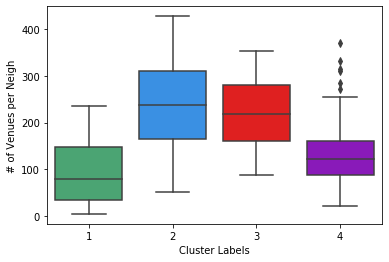

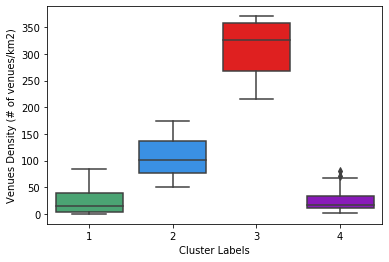

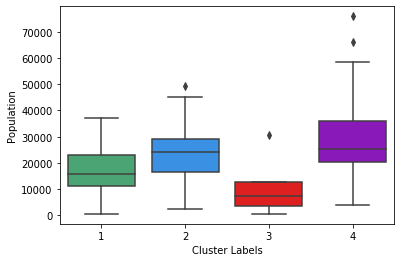

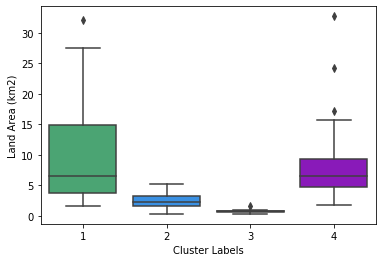

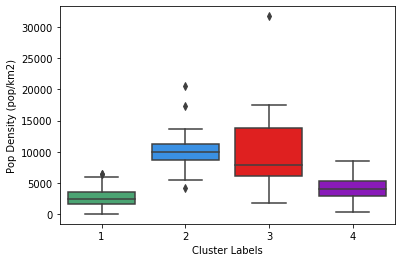

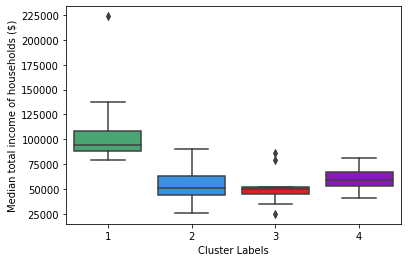

In [102]:

# Creating a dataframe isolating the cluster labels and the 3 neighborhood census data features
clustered_census = metroToMo_top10.loc[:,[metroToMo_top10.columns[1]] + list(metroToMo_top10.columns[8:14])]

# Box Plot

my_pal = {0: "mediumseagreen", 1: "dodgerblue", 2:"red",3:"darkviolet"}

nv_plot = sns.boxplot( x=clustered_census['Cluster Labels'], y=clustered_census['# of Venues per Neigh'],palette=my_pal)
nv_plot.set_xticklabels([1,2,3,4,5])
plt.show()

vd_plot = sns.boxplot( x=clustered_census['Cluster Labels'], y=clustered_census['Venues Density (# of venues/km2)'],palette=my_pal)
vd_plot.set_xticklabels([1,2,3,4,5])
plt.show()

p_plot=sns.boxplot( x=clustered_census['Cluster Labels'], y=clustered_census['Population'],palette=my_pal)
p_plot.set_xticklabels([1,2,3,4,5])
plt.show()

la_plot=sns.boxplot( x=clustered_census['Cluster Labels'], y=clustered_census['Land Area (km2)'],palette=my_pal)
la_plot.set_xticklabels([1,2,3,4,5])
plt.show()

pd_plot=sns.boxplot( x=clustered_census['Cluster Labels'], y=clustered_census['Pop Density (pop/km2)'],palette=my_pal)
pd_plot.set_xticklabels([1,2,3,4,5])
plt.show()

mi_plot=sns.boxplot( x=clustered_census['Cluster Labels'], y=clustered_census['Median total income of households ($)'],palette=my_pal)
mi_plot.set_xticklabels([1,2,3,4,5])
plt.show()


In [103]:
clustered_census.describe()

Cluster Labels  Land Area (km2)    Population  \
count  209.000000      209.000000       209.000000     
mean   1.928230        6.660096         24348.148325   
std    1.255609        5.491284         12524.909129   
min    0.000000        0.300000         560.000000     
25%    1.000000        2.900000         15330.000000   
50%    3.000000        5.350000         22706.000000   
75%    3.000000        8.620000         32086.000000   
max    3.000000        32.730000        75897.000000   

       Median total income of households ($)  Pop Density (pop/km2)  \
count  209.000000                             209.000000              
mean   66479.354067                           5391.218325             
std    23071.156532                           3875.506632             
min    24864.000000                           26.370000               
25%    51797.000000                           2933.590000             
50%    61036.000000                           4246.840000             
75%    75907.000000                           6670.940000             
max    223744.000000                          31741.670000            

       # of Venues per Neigh  Venues Density (# of venues/km2)  
count  209.000000             209.000000                        
mean   148.464115             51.743413                         
std    88.460008              68.110135                         
min    5.000000               0.155618                          
25%    84.000000              11.242604                         
50%    132.000000             27.181208                         
75%    195.000000             64.948454                         
max    427.000000             370.666667

<h2><b>Part 14: K-Means Clusters</b> </h2>

Note: "Not Available" indicates that no additional venue categories were found on that particular neighborhood.
<h3><b>Cluster 1: * Residential and Commercial Areas | Mid-Town. *</b> </h3> 

In [132]:
cluster_1 = metroToMo_top10.loc[metroToMo_top10['Cluster Labels'] == 0,metroToMo_top10.columns[~metroToMo_top10.columns.isin(['Borough'])]]
cluster_1.reset_index(drop=True, inplace=True)
print(cluster_1.shape)
cluster_1

#metroTO_data = metroTO_top10.columns[~metroTO_top10.columns.isin(['Borough'])]

(43, 23)


Postal Code  Cluster Labels  \
0   H1C         0                
1   H3E         0                
2   H3P         0                
3   H3R         0                
4   H3Y         0                
5   H4S         0                
6   H4X         0                
7   H7A         0                
8   H7E         0                
9   H7H         0                
10  H7K         0                
11  H7L         0                
12  H7P         0                
13  H7R         0                
14  H7X         0                
15  H7Y         0                
16  H9A         0                
17  H9C         0                
18  H9J         0                
19  H9K         0                
20  H9R         0                
21  H9W         0                
22  H9X         0                
23  M1C         0                
24  M1X         0                
25  M2L         0                
26  M2P         0                
27  M3B         0                
28  M4E         0                
29  M4G         0                
30  M4N         0                
31  M4R         0                
32  M4T         0                
33  M4V         0                
34  M4W         0                
35  M5J         0                
36  M5M         0                
37  M5N         0                
38  M5P         0                
39  M6S         0                
40  M8X         0                
41  M8Z         0                
42  M9B         0                

                                                                                     Neighbourhood  \
0   Rivière-des-Prairies Northeast                                                                   
1   L'Île-Des-Soeurs                                                                                 
2   Mount  Royal North                                                                               
3   Mount  Royal Central                                                                             
4   Westmount North                                                                                  
5   Saint-Laurent Southwest                                                                          
6   Montreal  West                                                                                   
7   Duvernay-Est                                                                                     
8   Duvernay                                                                                         
9   Auteuil West                                                                                     
10  Auteuil South                                                                                    
11  Sainte-Rose                                                                                      
12  Fabreville                                                                                       
13    Laval-sur-le-Lac                                                                               
14  Sainte-Dorothée                                                                                  
15  Îles-Laval                                                                                       
16  Dollard-des-Ormeaux Northwest                                                                    
17  L'Île-Bizard Northeast                                                                           
18  Kirkland                                                                                         
19  Senneville                                                                                       
20  Pointe-Claire                                                                                    
21  Beaconsfield                                                                                     
22  Sainte-Anne-De-Bellevue                                                                          
23  Rouge Hill, Port Union, Highland Creek                

<h4><b> Number of Neighborhoods in Cluster 1

In [111]:
cluster_1['City'].value_counts()

Montreal    23
Toronto     20
Name: City, dtype: int64

In [146]:
cluster_1.describe()

Median total income of households ($)  Pop Density (pop/km2)  \
count  43.000000                              43.000000               
mean   100572.627907                          2789.596744             
std    24106.093101                           1686.539180             
min    79117.000000                           26.370000               
25%    87762.500000                           1677.615000             
50%    94106.000000                           2381.420000             
75%    107840.000000                          3490.070000             
max    223744.000000                          6454.640000             

       Venues Density (# of venues/km2)  
count  43.000000                         
mean   21.417886                         
std    21.624835                         
min    0.155618                          
25%    3.188865                          
50%    14.579439                         
75%    39.313116                         
max    84.403670

<h4><b>Word Cloud for Cluster 1: Venue Categories

In [147]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


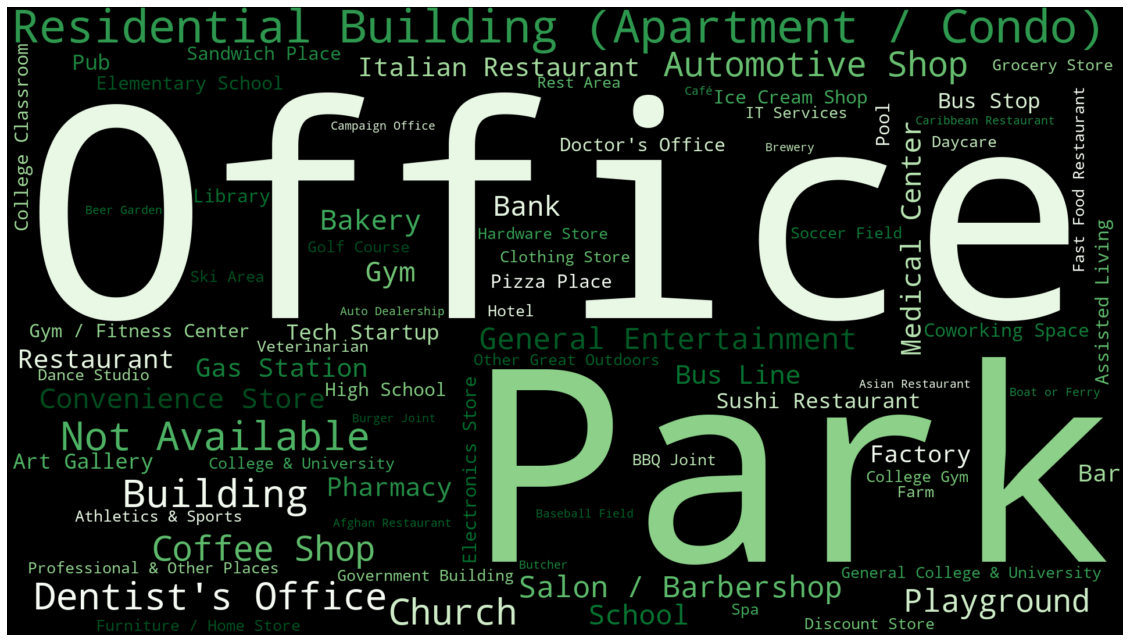

In [117]:
# Libraries needed 
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# Returning a dataframe containing only the columns that rank venue category names so we can flatten the data with the ravel function. 
c1 = metroToMo_top10.loc[metroToMo_top10['Cluster Labels'] == 0, metroToMo_top10.columns[list(range(14, metroToMo_top10.shape[1]))]]
#c1    

# Returns a contiguous flattened array
cluster1_data = pd.Series(c1.values.ravel('F'))
#cluster1_data

# Fit the data to a single column dataframe.
c1_categ = pd.DataFrame(columns = ['Venue Categories'])
c1_categ['Venue Categories'] = cluster1_data
c1_categ['Frequency']=""
#c1_categ

c1_categFrq= c1_categ.groupby(['Venue Categories']).count()
c1_categFrq.reset_index(inplace=True)
#c1_categFrq

# WordCloud().generate_from_frequencies() requires a dict
# Converting the Venue Categories & Frequency columns to a dict
c1freq_dict = dict(zip(c1_categFrq['Venue Categories'].tolist(), c1_categFrq['Frequency'].tolist()))
#print(c1freq_dict)

c1_wc = WordCloud(width=1920, height=1080, max_words=80,background_color="black", colormap="Greens",random_state=1 ).generate_from_frequencies(c1freq_dict)

plt.figure(figsize=(20, 15))
plt.imshow(c1_wc,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()


<h3> <b>Cluster 2: * Residential and Commercial Areas | Downtown *</b></h3> 

In [118]:
cluster_2 = metroToMo_top10.loc[metroToMo_top10['Cluster Labels'] == 1, metroToMo_top10.columns[~metroToMo_top10.columns.isin(['Borough'])]]
cluster_2.reset_index(drop=True, inplace=True)
cluster_2

Postal Code  Cluster Labels  \
0   H1W         1                
1   H1X         1                
2   H1Y         1                
3   H2A         1                
4   H2E         1                
5   H2G         1                
6   H2H         1                
7   H2J         1                
8   H2K         1                
9   H2L         1                
10  H2N         1                
11  H2P         1                
12  H2R         1                
13  H2S         1                
14  H2T         1                
15  H2W         1                
16  H2X         1                
17  H2Z         1                
18  H3H         1                
19  H3J         1                
20  H3N         1                
21  H3S         1                
22  H3W         1                
23  H3Z         1                
24  H4A         1                
25  H4C         1                
26  H4G         1                
27  M4H         1                
28  M4K         1                
29  M4P         1                
30  M4S         1                
31  M4X         1                
32  M5C         1                
33  M5E         1                
34  M5R         1                
35  M5S         1                
36  M5T         1                
37  M5V         1                
38  M6G         1                
39  M6H         1                
40  M6J         1                
41  M6K         1                
42  M6P         1                

                                                                                                 Neighbourhood  \
0   Hochelaga                                                                                                    
1   Rosemont Central                                                                                             
2   Rosemont South                                                                                               
3   Saint-Michel, East                                                                                           
4   Villeray Northeast                                                                                           
5   Petite-Patrie Northeast                                                                                      
6   Plateau  Mont-Royal North                                                                                    
7   Plateau  Mont-Royal North  Central                                                                           
8   Centre-Sud North                                                                                             
9   Centre-Sud South                                                                                             
10  Ahuntsic Southeast                                                                                           
11  Villeray West                                                                                                
12  Villeray Southeast                                                                                           
13  Petite-Patrie Southwest                                                                                      
14  Plateau  Mont-Royal West                                                                                     
15  Plateau  Mont-Royal South  Central                                                                           
16  Plateau  Mont-Royal Southeast                                                                                
17  Downtown  Montreal Northeast                                                                                 
18  Downtown  Montreal Southwest                                                                                 
19  Petite-Bourgogne                                                                                             
20  Parc-Extension                                                                                              

<h4><b> Number of Neighborhoods in Cluster 2

In [119]:
cluster_2['City'].value_counts()

Montreal    27
Toronto     16
Name: City, dtype: int64

In [154]:
cluster_2.describe()

Median total income of households ($)  Pop Density (pop/km2)  \
count  43.000000                              43.000000               
mean   53730.906977                           10008.642558            
std    14024.169102                           2922.274296             
min    25517.000000                           4205.450000             
25%    44310.000000                           8722.270000             
50%    50556.000000                           9883.700000             
75%    63272.000000                           11164.600000            
max    89969.000000                           20615.840000            

       Venues Density (# of venues/km2)  
count  43.000000                         
mean   106.342645                        
std    35.591591                         
min    51.369863                         
25%    76.904275                         
50%    101.533742                        
75%    137.164074                        
max    175.141243

<h4><b>Word Cloud for Cluster 2: Venue Categories

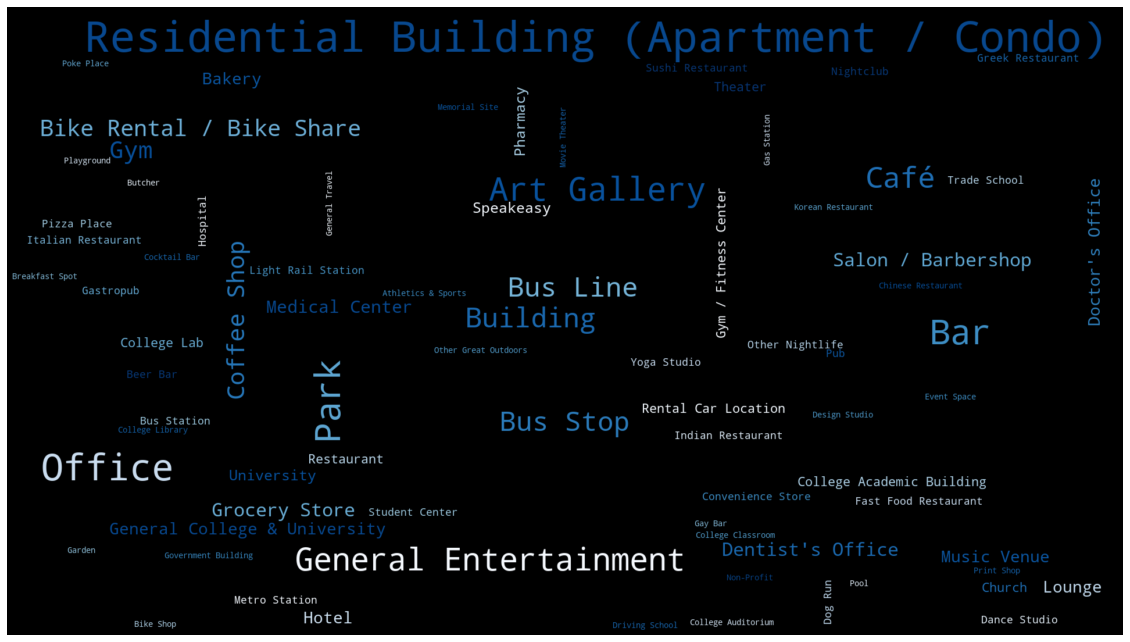

In [156]:
# Returning a dataframe containing only the columns that rank venue category names so we can flatten the data with the ravel function. 
c2 = metroToMo_top10.loc[metroToMo_top10['Cluster Labels'] == 1, metroToMo_top10.columns[list(range(14, metroToMo_top10.shape[1]))]]
#c2    

# Returns a contiguous flattened array
cluster2_data = pd.Series(c2.values.ravel('F'))
#cluster2_data

# Fit the data to a single column dataframe.
c2_categ = pd.DataFrame(columns = ['Venue Categories'])
c2_categ['Venue Categories'] = cluster2_data
c2_categ['Frequency']=""
#c2_categ

c2_categFrq= c2_categ.groupby(['Venue Categories']).count()
c2_categFrq.reset_index(inplace=True)
#c2_categFrq

# WordCloud().generate_from_frequencies() requires a dict
# Converting the Venue Categories & Frequency columns to a dict
c2freq_dict = dict(zip(c2_categFrq['Venue Categories'].tolist(), c2_categFrq['Frequency'].tolist()))
#print(c1freq_dict)

c2_wc = WordCloud(width=1920, height=1080, max_words=80,background_color="black", colormap="Blues",random_state=3).generate_from_frequencies(c2freq_dict)

plt.figure(figsize=(20, 15))
plt.imshow(c2_wc,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

<h3><b>Cluster 3: *Mostly Commercial Areas | Downtown *</b></h3> 

In [121]:
cluster_3 = metroToMo_top10.loc[metroToMo_top10['Cluster Labels'] == 2, metroToMo_top10.columns[~metroToMo_top10.columns.isin(['Borough'])]]
cluster_3.reset_index(drop=True, inplace=True)
cluster_3

Postal Code  Cluster Labels  \
0  H2Y         2                
1  H3A         2                
2  H3B         2                
3  H3G         2                
4  H3T         2                
5  M4Y         2                
6  M5B         2                
7  M5G         2                
8  M5H         2                

                                           Neighbourhood   Latitude  \
0  Old  Montreal                                          45.505700   
1  Downtown  Montreal  North( Mc Gill  University)        45.504000   
2  Downtown  Montreal East                                45.500500   
3  Downtown  Montreal Southeast ( Concordia  University)  45.498700   
4  Côte-des-Neiges Northeast                              45.501800   
5  Church and Wellesley                                   43.666286   
6  Garden District, Ryerson                               43.657478   
7  Central Bay Street                                     43.656761   
8  Richmond, Adelaide, King                               43.649670   

   Longitude      City Province  Land Area (km2)  Population  \
0 -73.555000  Montreal  QC       0.86             3455.0       
1 -73.574700  Montreal  QC       0.59             3580.0       
2 -73.568400  Montreal  QC       0.33             581.0        
3 -73.579300  Montreal  QC       0.75             7457.0       
4 -73.619100  Montreal  QC       1.64             12817.0      
5 -79.382446  Toronto   ON       0.96             30472.0      
6 -79.378632  Toronto   ON       0.73             12785.0      
7 -79.386490  Toronto   ON       0.61             8423.0       
8 -79.382248  Toronto   ON       0.33             2005.0       

   Median total income of households ($)  Pop Density (pop/km2)  \
0  78925.0                                4017.44                 
1  24864.0                                6067.80                 
2  47296.0                                1760.61                 
3  44949.0                                9942.67                 
4  34901.0                                7815.24                 
5  52167.0                                31741.67                
6  49856.0                                17513.70                
7  49696.0                                13808.20                
8  86101.0                                6075.76                 

   # of Venues per Neigh  Venues Density (# of venues/km2)  \
0  280                    325.581395                         
1  218                    369.491525                         
2  118                    357.575758                         
3  278                    370.666667                         
4  352                    214.634146                         
5  317                    330.208333                         
6  161                    220.547945                         
7  163                    267.213115                         
8  89                     269.696970                         

                      1st Most Common Venue  \
0  Art Gallery                                
1  Residential Building (Apartment / Condo)   
2  Building                                   
3  Residential Building (Apartment / Condo)   
4  College Classroom                          
5  Residential Building (Apartment / Condo)   
6  Residential Building (Apartment / Condo)   
7  Residential Building (Apartment / Condo)   
8  Office                                     

                      2nd Most Common Venue  \
0  Residential Building (Apartment / Condo)   
1  Hotel                                      
2  Clothing Store                             
3  Art Gallery                                
4  Residential Building (Apartment / Condo)   
5  Gay Bar                                    
6  General Entertainment                      
7  Clothing Store                             
8  Bar                                        

                      3rd Most Common Venue 4th Most Common Venue  \
0  Office       

<h4><b> Number of Neighborhoods in Cluster 3

In [122]:
cluster_3['City'].value_counts()

Montreal    5
Toronto     4
Name: City, dtype: int64

In [130]:
cluster_3.describe()

Cluster Labels   Latitude  Longitude  Land Area (km2)    Population  \
count  9.0             9.000000   9.000000   9.000000         9.000000       
mean   2.0             44.682322 -76.158480  0.755556         9063.888889    
std    0.0             0.972196   3.058579   0.394719         9168.918631    
min    2.0             43.649670 -79.386490  0.330000         581.000000     
25%    2.0             43.657478 -79.382248  0.590000         3455.000000    
50%    2.0             45.498700 -73.619100  0.730000         7457.000000    
75%    2.0             45.501800 -73.574700  0.860000         12785.000000   
max    2.0             45.505700 -73.555000  1.640000         30472.000000   

       Median total income of households ($)  Pop Density (pop/km2)  \
count  9.000000                               9.000000                
mean   52083.888889                           10971.454444            
std    19359.384174                           9182.059047             
min    24864.000000                           1760.610000             
25%    44949.000000                           6067.800000             
50%    49696.000000                           7815.240000             
75%    52167.000000                           13808.200000            
max    86101.000000                           31741.670000            

       # of Venues per Neigh  Venues Density (# of venues/km2)  
count  9.000000               9.000000                          
mean   219.555556             302.846206                        
std    92.259296              61.466528                         
min    89.000000              214.634146                        
25%    161.000000             267.213115                        
50%    218.000000             325.581395                        
75%    280.000000             357.575758                        
max    352.000000             370.666667

<h4><b>Word Cloud for Cluster 3: Venue Categories

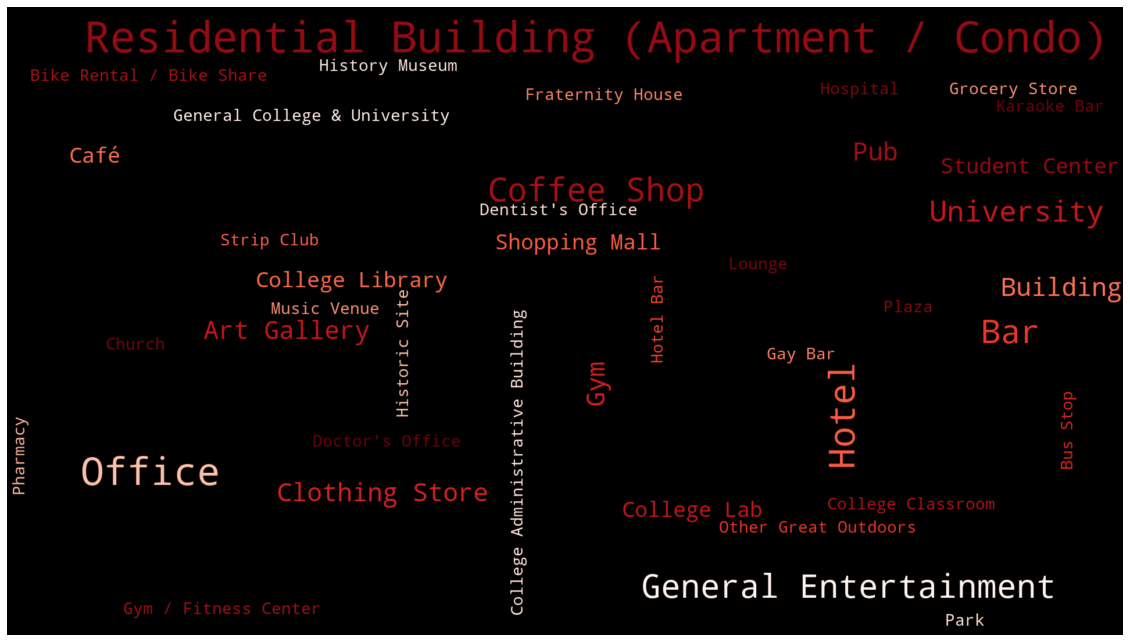

In [123]:
# Returning a dataframe containing only the columns that rank venue category names so we can flatten the data with the ravel function. 
c3 = metroToMo_top10.loc[metroToMo_top10['Cluster Labels'] == 2, metroToMo_top10.columns[list(range(14, metroToMo_top10.shape[1]))]]
#c3    

# Returns a contiguous flattened array
cluster3_data = pd.Series(c3.values.ravel('F'))
#cluster3_data

# Fit the data to a single column dataframe.
c3_categ = pd.DataFrame(columns = ['Venue Categories'])
c3_categ['Venue Categories'] = cluster3_data
c3_categ['Frequency']=""
#c3_categ

c3_categFrq= c3_categ.groupby(['Venue Categories']).count()
c3_categFrq.reset_index(inplace=True)
#c3_categFrq

# WordCloud().generate_from_frequencies() requires a dict
# Converting the Venue Categories & Frequency columns to a dict
c3freq_dict = dict(zip(c3_categFrq['Venue Categories'].tolist(), c3_categFrq['Frequency'].tolist()))
#print(c1freq_dict)

c3_wc = WordCloud(width=1920, height=1080, max_words=80,background_color="black", colormap="Reds", stopwords=['Not Available'], random_state=3 ).generate_from_frequencies(c3freq_dict)

plt.figure(figsize=(20, 15))
plt.imshow(c3_wc,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

<h3><b>Cluster 4: * Residential Areas and some Industrial Areas | City Suburbs *</b></h3> 

In [124]:
cluster_4 = metroToMo_top10.loc[metroToMo_top10['Cluster Labels'] == 3, metroToMo_top10.columns[~metroToMo_top10.columns.isin(['Borough'])]]
cluster_4.reset_index(drop=True, inplace=True)
cluster_4

Postal Code  Cluster Labels  \
0    H1A         3                
1    H1B         3                
2    H1E         3                
3    H1G         3                
4    H1H         3                
5    H1J         3                
6    H1K         3                
7    H1L         3                
8    H1M         3                
9    H1N         3                
10   H1P         3                
11   H1R         3                
12   H1S         3                
13   H1T         3                
14   H1V         3                
15   H1Z         3                
16   H2B         3                
17   H2C         3                
18   H2M         3                
19   H2V         3                
20   H3C         3                
21   H3K         3                
22   H3L         3                
23   H3M         3                
24   H3V         3                
25   H3X         3                
26   H4B         3                
27   H4E         3                
28   H4H         3                
29   H4J         3                
30   H4K         3                
31   H4L         3                
32   H4M         3                
33   H4N         3                
34   H4P         3                
35   H4R         3                
36   H4V         3                
37   H4W         3                
38   H7C         3                
39   H7G         3                
40   H7M         3                
41   H7N         3                
42   H7S         3                
43   H7T         3                
44   H7V         3                
45   H7W         3                
46   H8N         3                
47   H8P         3                
48   H8R         3                
49   H8S         3                
50   H8T         3                
51   H8Y         3                
52   H8Z         3                
53   H9B         3                
54   H9G         3                
55   H9H         3                
56   H9P         3                
57   H9S         3                
58   M1B         3                
59   M1E         3                
60   M1G         3                
61   M1H         3                
62   M1J         3                
63   M1K         3                
64   M1L         3                
65   M1M         3                
66   M1N         3                
67   M1P         3                
68   M1R         3                
69   M1S         3                
70   M1T         3                
71   M1V         3                
72   M1W         3                
73   M2H         3                
74   M2J         3                
75   M2K         3                
76   M2M         3                
77   M2N         3                
78   M2R         3                
79   M3A         3                
80   M3C         3                
81   M3H         3                
82   M3J         3                
83   M3K         3                
84   M3L         3                
85   M3M         3                
86   M3N         3                
87   M4A         3                
88   M4B         3                
89   M4C         3                
90   M4J         3                
91   M4L         3                
92   M4M         3                
93   M5A         3                
94   M6A         3                
95   M6B         3                
96   M6C         3                
97   M6E         3                
98   M6L         3                
99   M6M         3                
100  M6N         3                
101  M6R         3                
102  M8V         3                
103  M8W         3                
104  M8Y         3                
105  M9A         3                
106  M9C         3                
107  M9L         3                
108  M9M         3                
109  M9N         3                
110  M9P         3                
111  M9R         3                
112  M9V         3                
113  M9W      

<h4><b> Number of Neighborhoods in Cluster 4

In [125]:
cluster_4['City'].value_counts()

Montreal    58
Toronto     56
Name: City, dtype: int64

In [131]:
cluster_4.describe()

Cluster Labels    Latitude   Longitude  Land Area (km2)    Population  \
count  114.0           114.000000  114.000000  114.000000       114.000000     
mean   3.0             44.644273  -76.476980   7.564561         28335.938596   
std    0.0             0.909200    2.884786    4.299396         12789.768817   
min    3.0             43.599304  -79.585411   1.840000         3925.000000    
25%    3.0             43.729320  -79.401669   4.750000         20345.500000   
50%    3.0             45.432738  -73.855499   6.505000         25261.500000   
75%    3.0             45.533175  -73.648825   9.320000         36029.750000   
max    3.0             45.675300  -73.501600   32.730000        75897.000000   

       Median total income of households ($)  Pop Density (pop/km2)  \
count  114.000000                             114.000000              
mean   59564.719298                           4190.326754             
std    9759.744277                            1680.098752             
min    40730.000000                           275.440000              
25%    53221.750000                           2975.092500             
50%    58980.500000                           3995.440000             
75%    67409.250000                           5251.742500             
max    81014.000000                           8552.190000             

       # of Venues per Neigh  Venues Density (# of venues/km2)  
count  114.000000             114.000000                        
mean   131.140351             22.763636                         
std    67.009295              16.535248                         
min    21.000000              2.175439                          
25%    87.250000              10.764253                         
50%    122.000000             17.202105                         
75%    160.000000             33.131467                         
max    370.000000             81.521739

<h4><b>Word Cloud for Cluster 4: Venue Categories

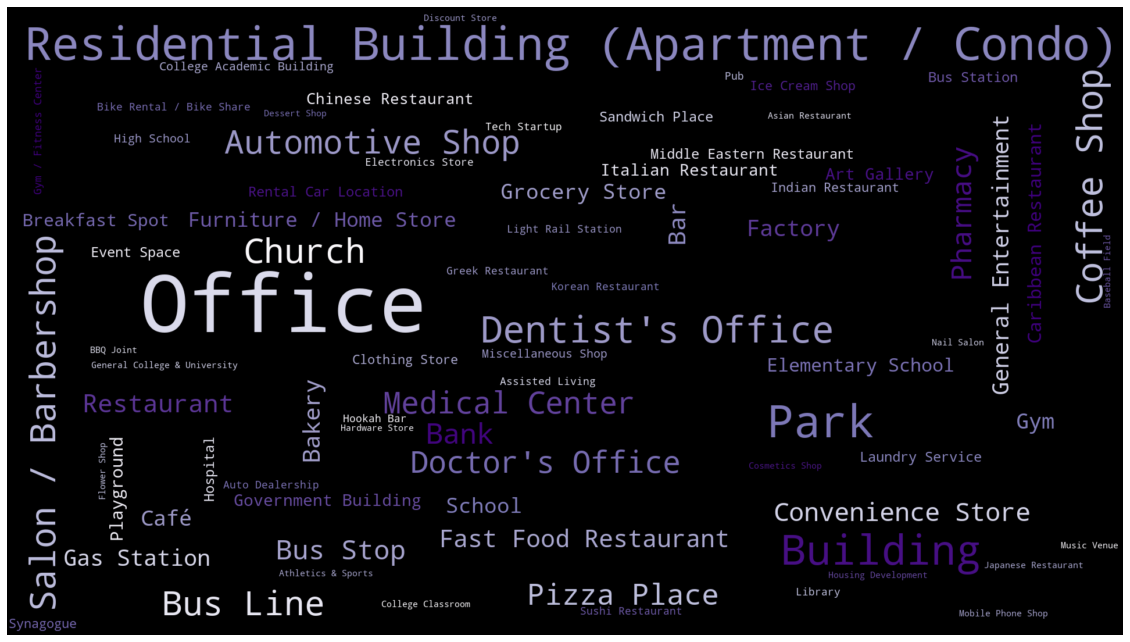

In [126]:
# Returning a dataframe containing only the columns that rank venue category names so we can flatten the data with the ravel function. 
c4 = metroToMo_top10.loc[metroToMo_top10['Cluster Labels'] == 3, metroToMo_top10.columns[list(range(14, metroToMo_top10.shape[1]))]]
#c4    

# Returns a contiguous flattened array
cluster4_data = pd.Series(c4.values.ravel('F'))
#cluster4_data

# Fit the data to a single column dataframe.
c4_categ = pd.DataFrame(columns = ['Venue Categories'])
c4_categ['Venue Categories'] = cluster4_data
c4_categ['Frequency']=""
#c4_categ

c4_categFrq= c4_categ.groupby(['Venue Categories']).count()
c4_categFrq.reset_index(inplace=True)
#c4_categFrq

# WordCloud().generate_from_frequencies() requires a dict
# Converting the Venue Categories & Frequency columns to a dict
c4freq_dict = dict(zip(c4_categFrq['Venue Categories'].tolist(), c4_categFrq['Frequency'].tolist()))
#print(c4freq_dict)


c4_wc = WordCloud(width=1920, height=1080,stopwords= "Not Available", max_words=80,background_color="black", colormap="Purples",random_state=2).generate_from_frequencies(c4freq_dict)

plt.figure(figsize=(20, 15))
plt.imshow(c4_wc,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

<h2> <b>Discussion</b></h2>

To best interpret the results, one must be familiar with at least one of the cities. This way you can uncover subtleties that may be present in one city. Then, results can be extrapolated or investigated to see if these are also true on the target city. For example, because I’m familiar with the city of Toronto, I can recognize how clusters 2 (blue) and 1 (green) are distributed across the city resembling the shape of the subway system. I can also notice how, in the same way that a street called Bloor does, some neighborhoods under cluster 2 (blue) form a straight line dividing downtown-Toronto from mid-town-Toronto. And, how neighborhoods in cluster number 3 (red) represent busy areas in downtown core, facing waterfront. All the above phenomena apply as well to neighborhood clusters in the city of Montreal. 
In cluster 1 (green), we are dealing with some distinguished neighborhoods. For starters, the median value for the median income of households for neighborhoods in this cluster are 59% higher than that of the next highest cluster. These neighborhoods are not too crowded in terms of both people (low population density), and commercial buildings (low venues density), are some of the biggest in terms  of land area (km2), sit in close proximity to downtown, are big on parks and green areas. Additionally, they have a great assortment of commercial venues nearby such as restaurants, bakeries, gyms and playgrounds, general entertainment, and more. Here, pieces of real state should be quite expensive. 

However, even if you are not familiar with any of the cities in the study, the report on its own reveal a great deal of information. For instance neighborhoods in cluster 3 (red) are densely packed, mostly commercial areas downtown. Population is very low, but land areas (km2) are even smaller; That’s what drives the relatively high population density in the area. But what is really filling up this neighborhoods are the high number of commercial venues, that paired with the floored land areas (km2), in comparison with the rest of the clusters, catapults the venues density (# of venues/km2) numbers to levels unattainable by the rest of the neighborhoods. In the word cloud on, you can see that most words are about the same font size, meaning that there is an even or well-balanced variety of venues, with no one venue category frequency sticking out.

Going outwards on any direction from neighborhoods in cluster 3 (red) (mostly commercial downtown areas), you will start seeing more residential areas, which indicates you have arrived at areas of cluster 2 (blue). These areas are still considered to be downtown; they are just the outer layer of downtown’s core. 

By looking at the higher population densities and the lower venue densities of neighborhoods in cluster 2 (blue) compared to the ones of cluster 3 (red), It seems like what is different between the two is that cluster 2 (blue)  neighborhoods have traded commercial venues in favor for population. Looking deeper into cluster 2’s numbers reveal that it is true that the population is higher, in fact its median is 3 times the one of cluster 3 (red) (see figure 15); although, the number of venues per neighborhood between the two is not much different. What is helping maintain their lower venues density figures are the slightly bigger land areas of cluster 2 (blue). That extra land space is likely being used to accommodate the significantly higher number of residents with residential real estate in the form of condominiums, apartments, houses. 
 
Lastly, cluster 4 (purple) represent mostly residential areas and a few industrial areas outside the city’s core. We do see factories among the most frequent venue categories on the word cloud on figure 21, but for the most part we see a higher concentration of venues that cater to family households such as dentists, pharmacies, doctor’s offices and other healthcare venues, educational centers, assorted ethnic restaurants, grocery stores, and more. The numerical features also corroborate what is expected out of suburban areas of the city, low to medium population density, low venues density and medium median household income. 


<h2> <b>Conclusion</b></h2>

In this project I used the k-means clustering algorithm. This method helped me identify and group into clusters neighborhoods, from the city of Toronto and the City of Montreal, that share similar venues composition and certain census attributes such as population density, and median income of households. I found that grouping neighborhoods into 4 clusters explains most of the variation observed in these two cities. Based on my findings, I categorized my clusters into cluster 1 (green) residential and commercial areas mid-town, cluster 2 (blue) residential and commercial areas downtown, cluster 3 (red) commercial area downtown, cluster 4 (purple) residential and some industrial areas city suburbs. 

Finally, there are many ways in which I could have approach this problem. But my results show the power of thinking outside of the box with unsupervised methods like k-means.


<h2> <b>Future Directions</b></h2>

This study is meant to be carried out on the initial phases when considering a new location for your business. At a subsequent stage, a more business-specific analysis will have to be done. This report, however, will help make better-informed decisions in the final stages of your search. For example, you want to expand your chain of vegan restaurants. After unfolding the more business-specific (vegan restaurants) analysis, you have located several pocket areas of low restaurant density (also areas of low vegan-restaurant density) across the target city (e.g. Montreal) that are at an adequate distance from the city center. With the results of my study on hand, stakeholders can now zero-in on that optimal location for your vegan restaurant. They can use this information to evaluate each of the tentative locations based on the attractiveness of the neighborhoods these are in; proximity to parks, water, or major roads; presence of venues that trigger the use of vegan restaurants such as a variety of entertainment venues, shopping malls, gyms, and more; real estate availability; social and economic dynamics of every neighborhood, which may include population density, median total income of households, and more. 